In [17]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Database Connection
import pymysql
from pymysql.err import OperationalError

import os
from dotenv import load_dotenv


# Preprocessing 
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


#Modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb


from sklearn.model_selection import GridSearchCV ,KFold , cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.metrics import precision_score ,  recall_score , f1_score , RocCurveDisplay, roc_auc_score
from sklearn.calibration import calibration_curve
from sklearn.tree import plot_tree


In [3]:
# Download Data from kaggle
!kaggle datasets download -d laotse/credit-risk-dataset

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
100%|█████████████████████████████████████████| 368k/368k [00:00<00:00, 422kB/s]
100%|█████████████████████████████████████████| 368k/368k [00:00<00:00, 421kB/s]


In [4]:
# Unzip the downloaded data
!unzip credit-risk-dataset.zip

Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


In [2]:
# Import data as pandas df
data = pd.read_csv('credit_risk_dataset.csv')

In [6]:
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [7]:
data.tail()

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

In [8]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [13]:
data.describe(include='object').T

count unique        top   freq
person_home_ownership      32581      4       RENT  16446
loan_intent                32581      6  EDUCATION   6453
loan_grade                 32581      7          A  10777
cb_person_default_on_file  32581      2          N  26836

In [3]:
# Check and handle duplicate values
data.duplicated().value_counts() # Total 165 duplicate values
data.drop_duplicates(inplace=True)

In [5]:
# Check Missing Values
print(data.isna().sum())
print("________Missing in Percentage_________")
round(data.isna().sum()/data.shape[0] * 100,2)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
________Missing in Percentage_________


person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.74
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.55
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [4]:
# Handle the missing values
# loan  interest rate vary bank to bank , so we can fill with average interest
data['loan_int_rate'].fillna(data['loan_int_rate'].median(),inplace=True)

# For person emp length missing values are for a very number of rows , so we can drop those
data.dropna(inplace=True)

In [7]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Now as we handle missing datas let's load these to database

In [68]:
# Check database connection

load_dotenv()
host= os.environ.get("HOST")
user = os.environ.get("USERNAME")
password = os.environ.get("PASSWORD")
database = os.environ.get("DATABASE")


mydb = None

try:
    mydb = pymysql.connect(
        host=host,
        user=user,
        password=password
    )

    print("Successfully connected to the database")

except OperationalError as e:
    print("Error while connecting to MySQL", e)

finally:
    if mydb:
        mydb.close()
        print("MySQL connection is closed")

Successfully connected to the database
MySQL connection is closed


In [60]:
# Mapping DataFrame dtypes to MySql data types
dtype_mapping = {
    'int64': 'INT',
    'float64':'DECIMAL(10,2)',
    'object':'VARCHAR(255)',  # Default to VARCHAR for string types
    'datetime64[ns]':'DATETIME',
    'bool':'BOOLEAN'
}

def get_mysql_dtype(pandas_dtype):
    return dtype_mapping.get(str(pandas_dtype),'VARCHAR(255)')

def sanitize_col_name (col_name):
    # Replace spaces with underscores and ensure it starts with a letter
    sanitize_name = col_name.replace(' ', '_').replace('$','_').replace('-','_')
    if not sanitize_name[0].isalpha():
        sanitize_name = 'col_' + sanitize_name
    return sanitize_name

def get_columns_definitions(df):
    columns =[]

    for col, dtype in df.dtypes.items():
        mySql_dtype = get_mysql_dtype(dtype)
        sanitized_col = sanitize_col_name(col)
        columns.append(f"`{sanitized_col}` {mySql_dtype}")
    return ','.join(columns)




In [61]:
get_columns_definitions(data)

'`person_age` INT,`person_income` INT,`person_home_ownership` VARCHAR(255),`person_emp_length` DECIMAL(10,2),`loan_intent` VARCHAR(255),`loan_grade` VARCHAR(255),`loan_amnt` INT,`loan_int_rate` DECIMAL(10,2),`loan_status` INT,`loan_percent_income` DECIMAL(10,2),`cb_person_default_on_file` VARCHAR(255),`cb_person_cred_hist_length` INT'

In [62]:
# Create a function to Create Table query 
def create_table_query(table_name , df):
    column_definitions = get_columns_definitions(df)
    query = f"""
            CREATE TABLE {table_name} (
            {column_definitions});
            """
    return query

In [65]:
create_table_query('credit_risk', data)

'\n            CREATE TABLE credit_risk (\n            `person_age` INT,`person_income` INT,`person_home_ownership` VARCHAR(255),`person_emp_length` DECIMAL(10,2),`loan_intent` VARCHAR(255),`loan_grade` VARCHAR(255),`loan_amnt` INT,`loan_int_rate` DECIMAL(10,2),`loan_status` INT,`loan_percent_income` DECIMAL(10,2),`cb_person_default_on_file` VARCHAR(255),`cb_person_cred_hist_length` INT);\n            '

### Create table from Data Frame

In [72]:
def create_table_from_dataframe(host, user ,password ,database, table_name, df):
    connection = None

    try:
        # Connect to MySql server
        connection = pymysql.connect(
            host = host,
            user = user,
            password = password,
            database= database
        )
        cursor = connection.cursor()
        
        # Generate the Create table statement 
        create_table_statement = create_table_query(table_name, df)

        # Execute the Create table statement
        cursor.execute(create_table_statement)
        print(f"Table '{table_name}' Created Successfully")

    except pymysql.MySQLError as e:
        print(f"Error: {e}")

    finally:
        if connection:
            cursor.close()
            connection.close()
            print("MySql connection is closed")

In [73]:
create_table_from_dataframe(host=host,user=user, password=password ,database=database,table_name='credit_risk_data',df=data)

Table 'credit_risk_data' Created Successfully
MySql connection is closed


### Now insert data to newly created DB Table

In [81]:


def insert_data_from_dataframe(host, user, password, database, table_name, df):
    connection  = None
    df = df
    try:
        # Connect to the MySQL server
        connection = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        cursor = connection.cursor()

        # Replace NAN values with None
        # df = replace_nan_values(df)

        # Prepare the INSERT statement

    # Loop through the DataFrame's column names and types
        columns = [sanitize_col_name(col) for col in df.columns]
        column_names = ', '.join(f"`{col}`" for col in columns)
        placeholders = ', '.join(['%s'] * len(columns))
        insert_stmt = f"INSERT INTO {table_name} ({column_names}) VALUES ({placeholders})"

        # Prepare data
        data = [tuple(row) for row in df.to_records(index=False)]

        # Execute the INSERT statement
        cursor.executemany(insert_stmt, data)
        connection.commit()
        print(f"Inserted {cursor.rowcount} rows into '{table_name}'")

    except pymysql.MySQLError as e:
        print(f"Error: {e}")

    finally:
        if connection:
            cursor.close()
            connection.close()
            print("MySQL connection is closed")



In [82]:
insert_data_from_dataframe(host=host,user=user, password=password ,database=database,table_name='credit_risk_data',df=data)

Inserted 31529 rows into 'credit_risk_data'
MySQL connection is closed


### Fetch data from DB

In [83]:

connection = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
cursor = connection.cursor()

In [89]:
query = f"select * from {database}.credit_risk_data"
df_mysql = pd.read_sql(query, connection)


/var/folders/1q/97slxf2n6bv2jwc9z0pm2jch0000gn/T/ipykernel_1826/1085828183.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql(query, connection)


In [90]:
df_mysql

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
31524          57          53000              MORTGAGE                1.0   
31525          54         120000              MORTGAGE                4.0   
31526          65          76000                  RENT                3.0   
31527          56         150000              MORTGAGE                5.0   
31528          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
31524         PERSONAL          C       5800          13.16            0   
31525         PERSONAL          A      17625           7.49            0   
31526  HOMEIMPROVEMENT          B      35000          10.99            1   
31527         PERSONAL          B      15000          11.48            0   
31528          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
31524                 0.11                         N   
31525                 0.15                         N   
31526                 0.46                         N   
31527                 0.10                         N   
31528                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
31524                          30  
31525                          19  
31526                          28  
31527                          26  
31528                          30  

[31529 rows x 12 columns]

### Exploring data distribution

In [5]:
# there are persons who are older than 85 years - as the rule person can not get credit after 85 years 
# delete all persons older 85 years
data =data[data["person_age"]<=85] 

In [6]:
# People with employment > 60 years will be deleted.
data =data[data["person_emp_length"] <= 60]

                       count  in Percentage
person_home_ownership                      
RENT                   16006          50.78
MORTGAGE               13018          41.30
OWN                     2391           7.59
OTHER                    106           0.34




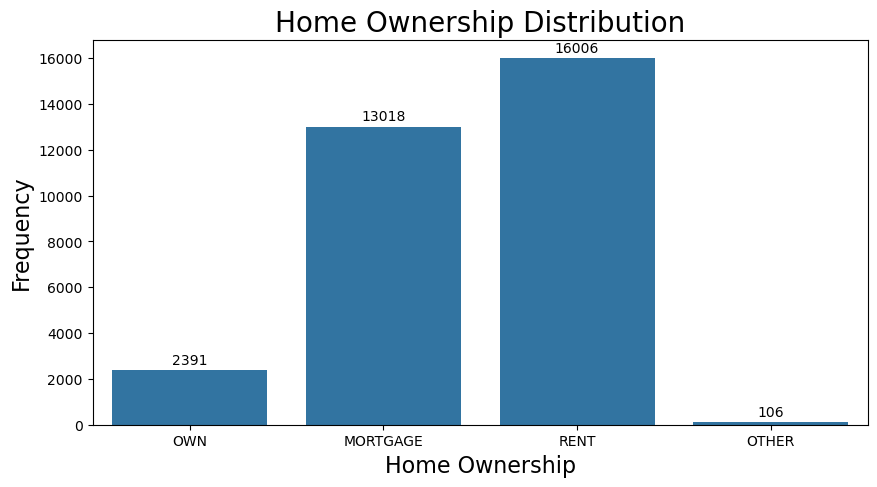



                   count  in Percentage
loan_intent                            
EDUCATION           6246          19.82
MEDICAL             5868          18.62
VENTURE             5518          17.51
PERSONAL            5346          16.96
DEBTCONSOLIDATION   5044          16.00
HOMEIMPROVEMENT     3499          11.10




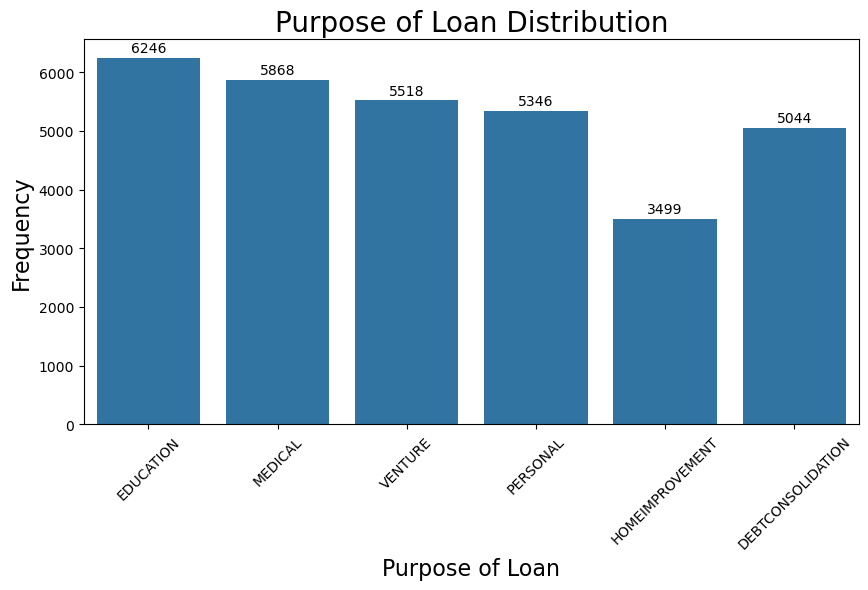



            count  in Percentage
loan_grade                      
A           10300          32.68
B           10121          32.11
C            6300          19.99
D            3549          11.26
E             951           3.02
F             236           0.75
G              64           0.20




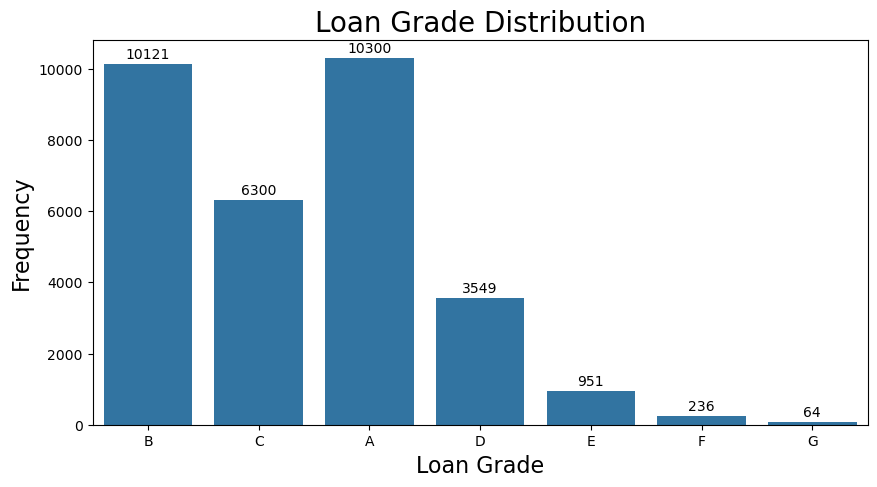



                           count  in Percentage
cb_person_default_on_file                      
N                          25907          82.19
Y                           5614          17.81




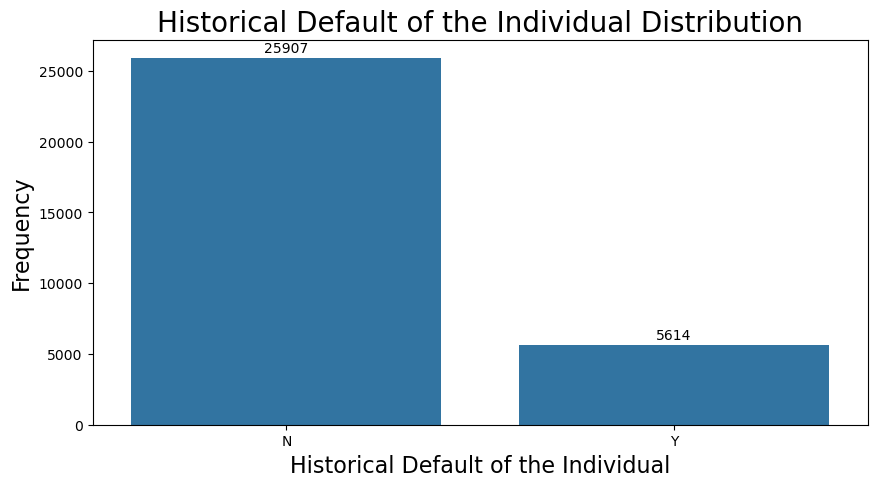

In [103]:
# Exploring Categorical features
cat_features = data.select_dtypes(include=['object'])
cat_x_labels = ["Home Ownership", "Purpose of Loan", "Loan Grade", "Historical Default of the Individual"]
cat_title =  ["Home Ownership Distribution", "Purpose of Loan Distribution", "Loan Grade Distribution", "Historical Default of the Individual Distribution"]

for i, k in enumerate(cat_features):
    feature = data[k].value_counts().reset_index().sort_values(by='count', ascending=False)
    feature['in Percentage'] = round(feature['count']/data.shape[0] *100, 2)
    print(feature.set_index(k))
    print('\n') 
    fig, ax = plt.subplots(figsize = (10,5))
    sns.countplot(x=k,data=data,ax=ax)
    ax.bar_label(ax.containers[0],padding=2,color='black',fontsize=10)
    ax.set_xlabel(cat_x_labels[i],fontsize =16)
    ax.set_ylabel("Frequency", fontsize= 16)
    ax.set_title(cat_title[i],fontsize = 20)
    if i ==1 :
        ax.tick_params(axis='x',rotation = 45)
    plt.show()
    print('\n')


### Observations:

* Most people who takes credit has a rent house (50.78 %) or have mortage(41.30 %)
* Most common loan is for EDUCATION(19.82%) , where as least common is for HOMEIMPROVEMENT (11.10%)
* The majority of loans have a grade of A or B (~32%), which may indicate that these are the most favorable or desirable loan options. Loans with grades E, F, or G (<3%) may be considered riskier or less desirable.
* Majority of the individuals are not defaulter ( 82.19%) , where some of the individuls fall under defaulter list(17.81%).

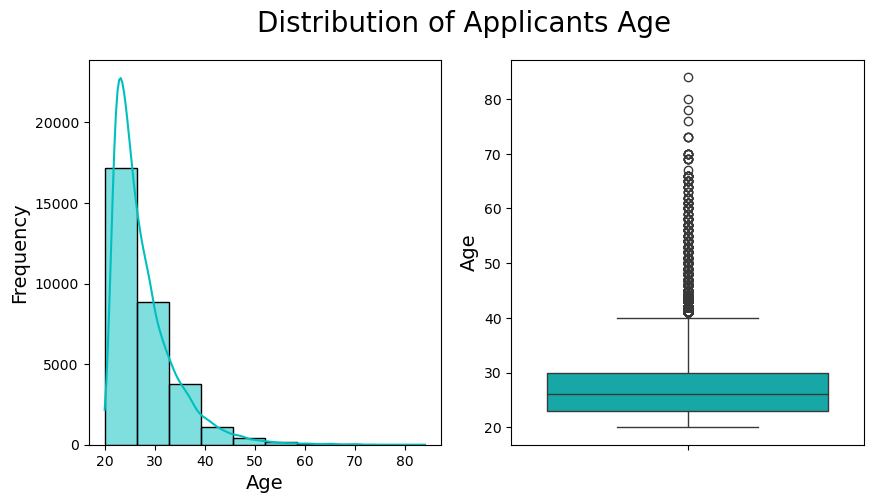

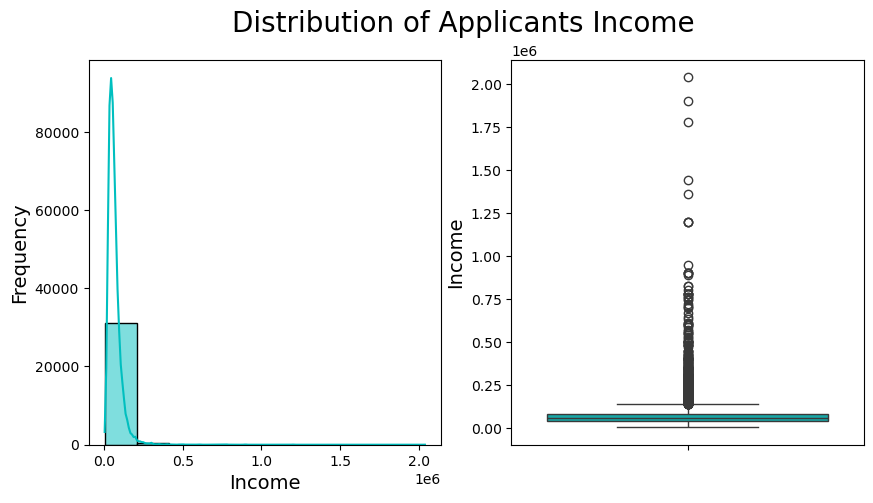

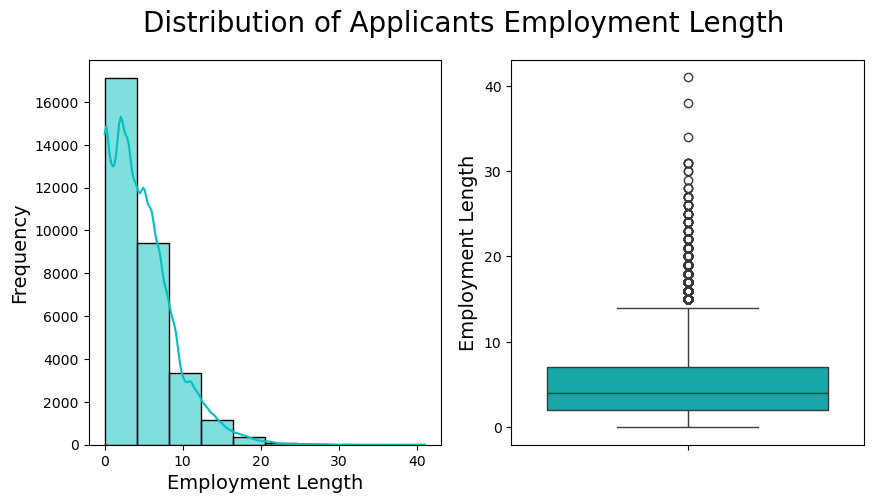

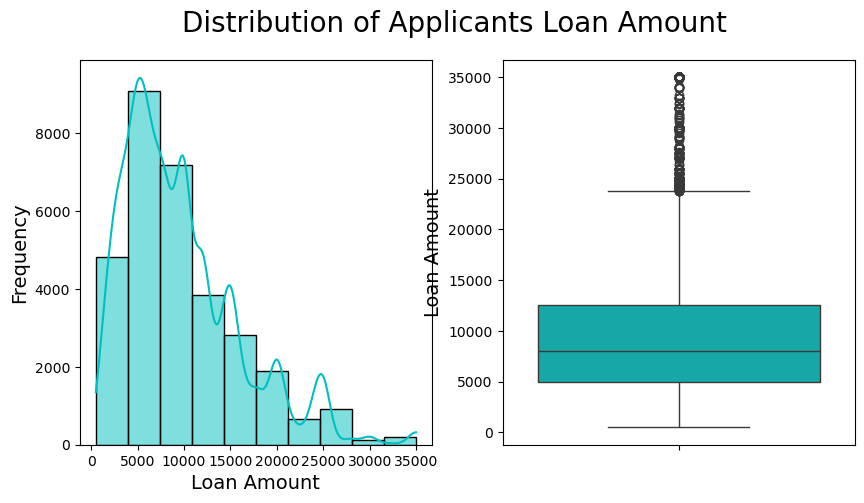

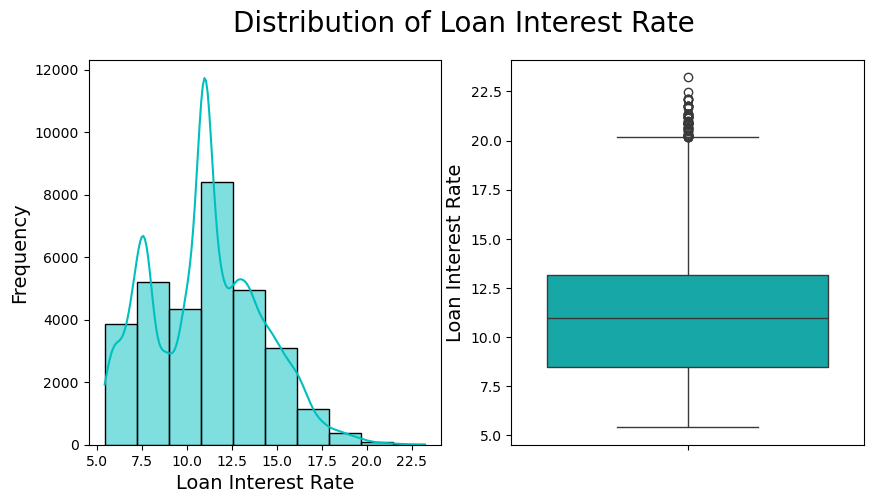

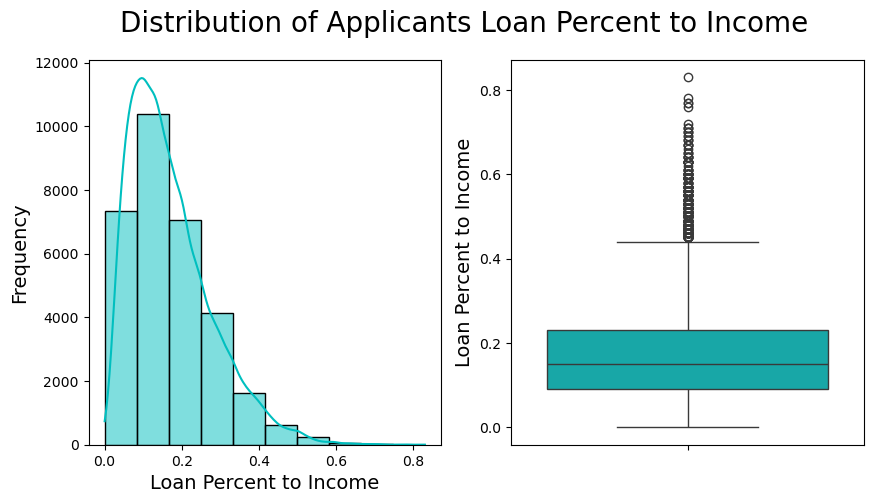

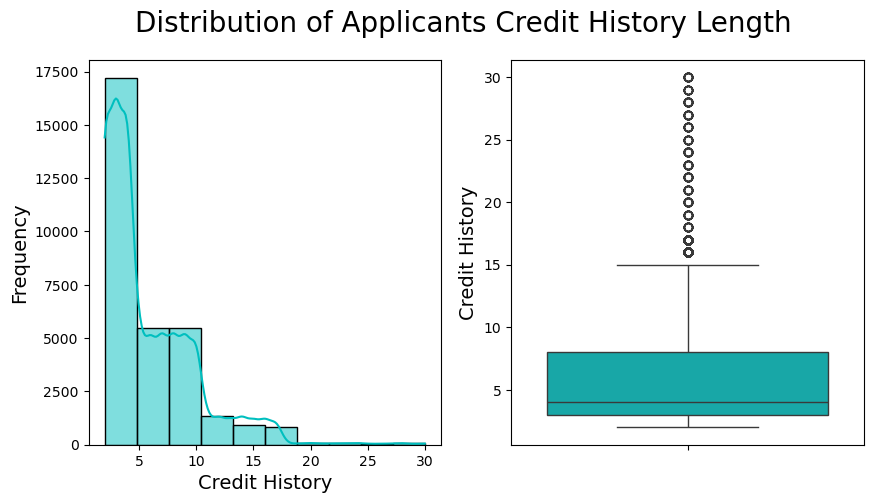

In [108]:
# Exploring Numerical Features
df_num_features = data.select_dtypes(include=['float64', 'int64']).drop("loan_status", axis = 1)
num_features = df_num_features.columns
num_x_labels=["Age","Income","Employment Length", "Loan Amount", "Loan Interest Rate", "Loan Percent to Income","Credit History"]
num_titles=["Distribution of Applicants Age", "Distribution of Applicants Income","Distribution of Applicants Employment Length","Distribution of Applicants Loan Amount", "Distribution of Loan Interest Rate","Distribution of Applicants Loan Percent to Income", "Distribution of Applicants Credit History Length"]

for i, k in enumerate(num_features):
        fig, axs = plt.subplots(1,2,figsize=(10,5))
        plt.suptitle(num_titles[i], fontsize =20)
        
        sns.histplot(x= k, data = data, kde = True, color = "c", bins = 10, ax =axs[0])
        axs[0].set_xlabel(num_x_labels[i],fontsize =14)
        axs[0].set_ylabel('Frequency',fontsize =14)
        
        sns.boxplot(y= k, data = data, color ="c", ax =axs[1])
        axs[1].set_ylabel(num_x_labels[i], fontsize =14)
        
        plt.subplots_adjust(wspace=0.2, hspace=0.8)
        plt.show()

### Observations:
* Most of the credit borrowers are 20-30 years old with low income and employment length. 
* Credit history less than 10 years. The most popular loan amount ist 5.000-10.000$ with interest rates ranging from 7-13%.


All distribution are right skewed with long tail and have lots of outliers. It can lead to biased estimates of summary statistics and can affect the performance of the statistical models and the validity of assumptions in certain statistical tests and models.


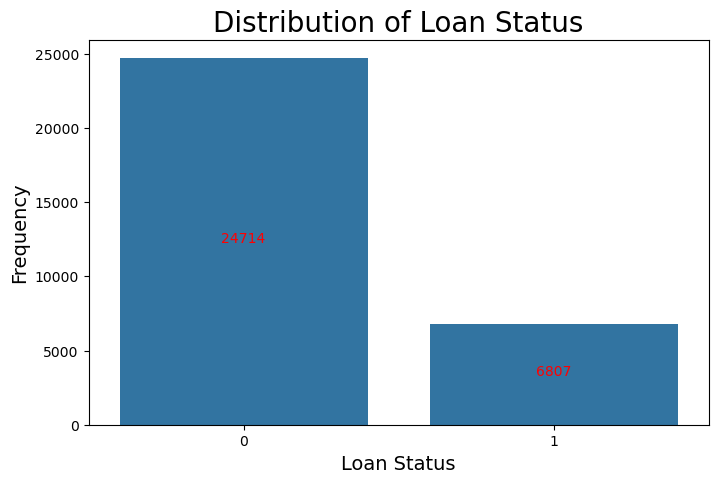

Non Default : 78.4
Default : 21.6


In [17]:
# Distribution of Target Column

fig ,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x= 'loan_status',data=data)
ax.set_xlabel('Loan Status',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.bar_label(ax.containers[0],padding=2 , color ='red',label_type='center',fontsize=10)
ax.set_title("Distribution of Loan Status", fontsize=20)
plt.show()

print("Non Default :", round(data['loan_status'].value_counts()[0]/len(data)*100,2))
print("Default :", round(data['loan_status'].value_counts()[1]/len(data)*100,2))

### Observation:

* The majority of borrowers in the dataset (78.4%) have successfully paid back their loans without defaulting, while 21.6% have defaulted on their loans.

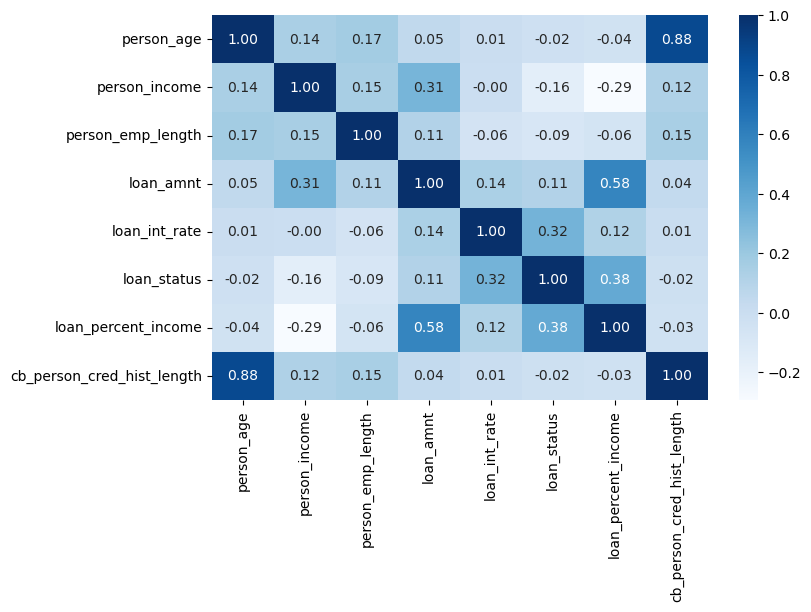

In [21]:
# Correlation analysis
num_df = data.select_dtypes(include=['float64','int64'])
corr = num_df.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

### Observation:

* Person_age and person_cred_hist_length has a strong correlation (~88%), as expected. Older people tend to have longer credit histories, which is a natural consequence of aging.
* Loan_person_income and loan_amount has a moderate correlation (~58%). As the loan amount increases, the proportion of income committed to the loan tends to increase, that is also expected.
* Person_income and loan_amount: The relationship between income and loan amount is positive (week correlation ~31%), meaning that people with higher incomes tend to borrow more. This is also expected, because individuals with higher incomes have more financial resources to repay debt.
* Negative effect on loan_status have person_income, person_emp_length, person_age and credit history. These variables have a positive impact on loan quality, making it less likely for borrowers with higher values of these variables to default on their loans.

* Positive effect on loan_status have loan_percent_income, loan_int_rate, and loan_amnt. It means, that as they increase, the risk of default increases.

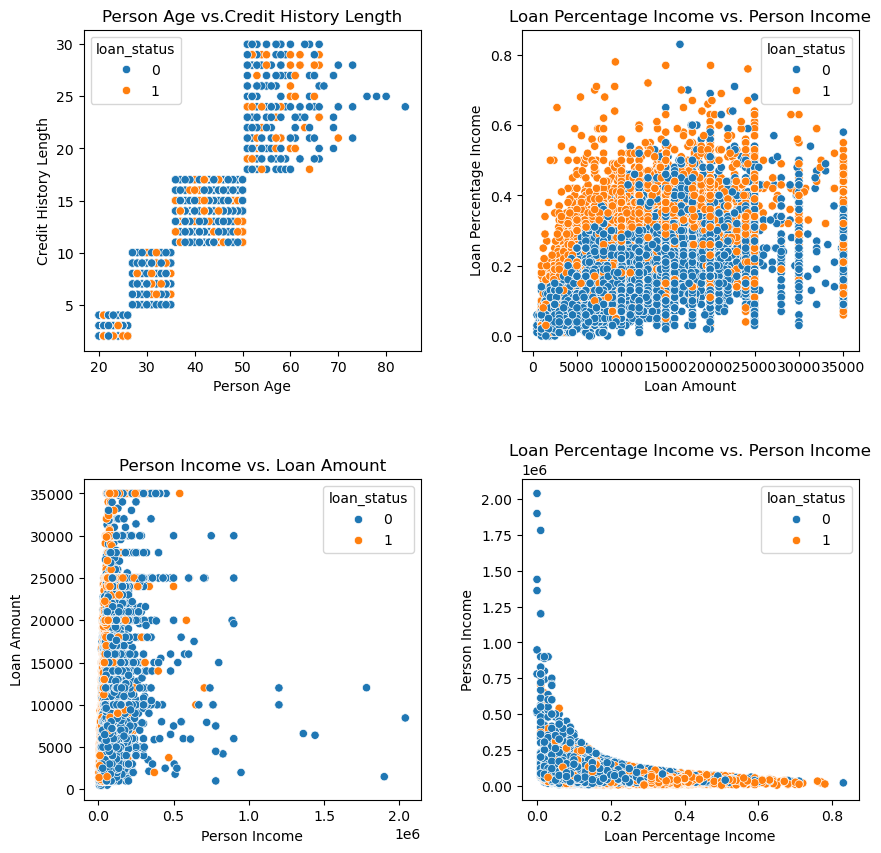

In [26]:
#Scatterplots for the correlating variables:

fig,axes =plt.subplots(2,2,figsize=(10,10))
x_labels=["Person Age","Loan Amount", "Person Income", "Loan Percentage Income"]
y_labels=["Credit History Length","Loan Percentage Income", "Loan Amount", "Person Income"]
titles=["Person Age vs.Credit History Length","Loan Percentage Income vs. Person Income", "Person Income vs. Loan Amount","Loan Percentage Income vs. Person Income"]
ax=[axes[0,0],axes[0,1],axes[1,0],axes[1,1]]
x =["person_age","loan_amnt","person_income","loan_percent_income"]
y=["cb_person_cred_hist_length","loan_percent_income","loan_amnt","person_income"]

for i in range(len(x_labels)):
    sns.scatterplot(x=x[i],y = y[i],data=data, hue='loan_status',ax = ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel(x_labels[i])
    ax[i].set_ylabel(y_labels[i])

plt.subplots_adjust(wspace=0.3 ,hspace=0.4)
plt.show()

### Observation:

* There is a strong positive dependence between Person_age and Person_cred_hist_length: the older individuals tend to have longer credit histories.
* The second and forth plots indicate that as "loan_percent_income" increases, the number of defaults tend to increase. This suggests that "loan_percent_income" is a strong predictor of loan default.
* The third plot shows that individuals with higher incomes tend to borrow less and have a lower risk of default. The individuals with lower incomes tend to borrow more and have a higher risk of default. This observation highlights the importance of considering income as a crucial factor in predicting loan default.

In [40]:
# Loan Status
home_loan_status = pd.crosstab(index=data['person_home_ownership'],columns = data.loan_status,margins=True )
home_loan_status.columns= ['Non Default %', 'Default %', 'Total']
home_loan_status['Non Default %'] = round(home_loan_status['Non Default %']/home_loan_status['Total'] * 100,2)
home_loan_status['Default %'] = round(home_loan_status['Default %']/home_loan_status['Total'] * 100,2)

home_ownership = data.groupby(['person_home_ownership','cb_person_default_on_file'])['loan_status'].sum().reset_index().sort_values(by='loan_status',ascending=False)
home_ownership['loan_status_percent'] = home_ownership['loan_status']/home_ownership['loan_status'].sum()
print("         Home ownership vs. Loan Status")
print(home_loan_status)
print("-----------------------------------------------------\n")

grade_loan_status = pd.crosstab(index=data['loan_grade'],columns = data.loan_status,margins=True )
grade_loan_status.columns= ['Non Default %', 'Default %', 'Total']
grade_loan_status['Non Default %'] = round(grade_loan_status['Non Default %']/grade_loan_status['Total'] * 100,2)
grade_loan_status['Default %'] = round(grade_loan_status['Default %']/grade_loan_status['Total'] * 100,2)

loan_grade = data.groupby(['loan_grade','cb_person_default_on_file'])['loan_status'].sum().reset_index().sort_values(by='loan_status',ascending=False)
loan_grade['loan_status_percent'] = loan_grade['loan_status']/loan_grade['loan_status'].sum()
print("         Loan Grade vs. Loan Status")
print(grade_loan_status)
print("-----------------------------------------------------\n")





         Home ownership vs. Loan Status
                       Non Default %  Default %  Total
person_home_ownership                                 
MORTGAGE                       87.50      12.50  13018
OTHER                          68.87      31.13    106
OWN                            93.06       6.94   2391
RENT                           68.88      31.12  16006
All                            78.40      21.60  31521
-----------------------------------------------------

         Loan Grade vs. Loan Status
            Non Default %  Default %  Total
loan_grade                                 
A                   90.44       9.56  10300
B                   84.03      15.97  10121
C                   79.68      20.32   6300
D                   41.22      58.78   3549
E                   35.75      64.25    951
F                   29.66      70.34    236
G                    1.56      98.44     64
All                 78.40      21.60  31521
--------------------------------------------

In [41]:
# Loan Intent vs Loan Status
intent_loan_status = grade_loan_status = pd.crosstab(index=data['loan_intent'],columns = data.loan_status,margins=True )
intent_loan_status.columns= ['Non Default %', 'Default %', 'Total']
intent_loan_status['Non Default %'] = round(intent_loan_status['Non Default %']/intent_loan_status['Total'] * 100,2)
intent_loan_status['Default %'] = round(intent_loan_status['Default %']/intent_loan_status['Total'] * 100,2)

loan_intent = data.groupby(['loan_intent','cb_person_default_on_file'])['loan_status'].sum().reset_index().sort_values(by='loan_status',ascending=False)
loan_intent['loan_status_percent'] = loan_intent['loan_status']/loan_intent['loan_status'].sum()
print("         Loan Intent vs. Loan Status")
print(intent_loan_status)
print("-----------------------------------------------------\n")

         Loan Intent vs. Loan Status
                   Non Default %  Default %  Total
loan_intent                                       
DEBTCONSOLIDATION          71.55      28.45   5044
EDUCATION                  83.01      16.99   6246
HOMEIMPROVEMENT            74.39      25.61   3499
MEDICAL                    73.40      26.60   5868
PERSONAL                   80.49      19.51   5346
VENTURE                    85.30      14.70   5518
All                        78.40      21.60  31521
-----------------------------------------------------



In [43]:
default_on_file_loan_status = grade_loan_status = pd.crosstab(index=data['cb_person_default_on_file'],columns = data.loan_status,margins=True )
default_on_file_loan_status.columns= ['Non Default %', 'Default %', 'Total']
default_on_file_loan_status['Non Default %'] = round(default_on_file_loan_status['Non Default %']/default_on_file_loan_status['Total'] * 100,2)
default_on_file_loan_status['Default %'] = round(default_on_file_loan_status['Default %']/default_on_file_loan_status['Total'] * 100,2)


print("        Historical default of the individual  vs. Loan Status")
print(default_on_file_loan_status)
print("-----------------------------------------------------\n")

        Historical default of the individual  vs. Loan Status
                           Non Default %  Default %  Total
cb_person_default_on_file                                 
N                                  81.88      18.12  25907
Y                                  62.38      37.62   5614
All                                78.40      21.60  31521
-----------------------------------------------------



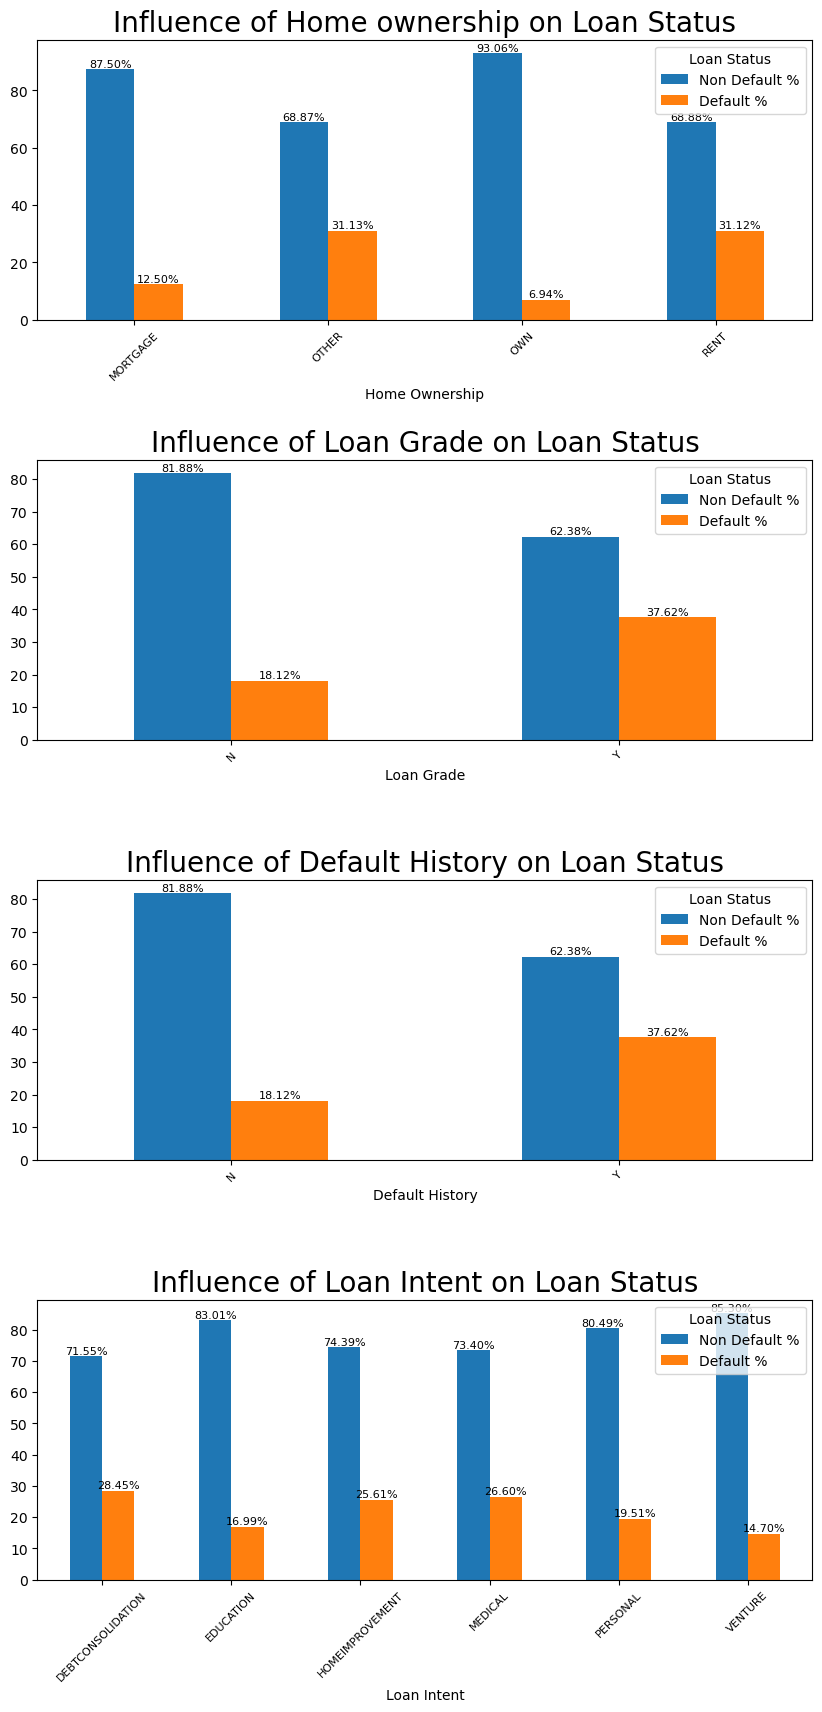

In [58]:
# Lets visualize above data

fig ,axes = plt.subplots(4, 1,figsize=(10,20))
x_labels=["Home Ownership","Loan Grade",  "Default History","Loan Intent"]
titles=["Influence of Home ownership on Loan Status","Influence of Loan Grade on Loan Status", "Influence of Default History on Loan Status","Influence of Loan Intent on Loan Status"]
x1 =[home_loan_status,grade_loan_status,default_on_file_loan_status, intent_loan_status]

for i in range(len(x_labels)):
    x1[i].iloc[:-1,0:2].plot.bar(ax=axes[i])
    axes[i].set_xlabel(x_labels[i],fontsize = 10)
    axes[i].set_title(titles[i],fontsize=20)
    axes[i].legend(title = 'Loan Status')
    for p in axes[i].patches:
        axes[i].text(p.get_x() + p.get_width()/2., p.get_height(), f"{p.get_height():.2f}%", ha='center', va='bottom',fontsize = 8)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, fontsize =8)
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### Observation:

* The overall default rate for all individuals is 21.60%.
* Home owners (MORTGAGE, OWN) tend to have a lower loan default rate compared to renters (RENT) and those with other types of home ownership (OTHER). These findings can suggest that owning a home or having a mortgage might be associated with a lower risk of loan default compared to renting or having other types of home ownership.
* Loans with a grade A have the highest non-default rate (90.44%) and the lowest default rate (9.56%). Loans with a grade F have the lowest non-default rate (29.66%) and the highest default rate (70.34%). As you move from higher-grade loans (A, B, C) to lower-grade loans (D, E, F), the non-default rate decreases, while the default rate increases. It can mean, that higher-grade loans are less likely to default, while lower-grade loans are more likely to default.
* Individuals who already has default history have a higher default rate of 37.62%, compared to those who doesn't have (18.12%). It can mean that individuals with positive default history may be more likely to default on their loans.
* The loan intent categories with the highest proportion of loans that are in default are DEBTCONSOLIDATION (28.45%), HOMEIMPROVEMENT(25.61%) and MEDICAL (26.60%). They have a higher risk of default, while loans for education (EDUCATION) and venture purposes (VENTURE) have a lower risk of default (16.99% and 14.70%, respectively).

In [20]:
# Percentage
# Create new categories to reduce the impact outliers
# Create age categories
bins = [-1, 20 ,30, 40, 50 ,60 ,70, 1000]
labels = ["0-20","20-30","30-40","40-50","50-60","60-70","70+"]
data["age_cat"] = pd.cut(data['person_age'],bins= bins, labels=labels)
age_cat = data['age_cat'].value_counts().reset_index()
print(age_cat.set_index("age_cat"))
print("----------------------------------------------------\n")


# Create Person_emp_length Categories
bins = [-1, 5 , 10, 15 ,1000]
labels = ["0-5","5-10","10-15","15+"]

data["emp_length_cat"] = pd.cut(data['person_emp_length'],bins = bins , labels=labels)
emp_length_cat = data["emp_length_cat"].value_counts().reset_index()
print(emp_length_cat.set_index('emp_length_cat'))
print("----------------------------------------------------\n")

# Create person_income Categoris
bins = [0, 25000, 50000, 75000, 100000, 500000]
labels = ["0-25000","25000-50000","50000-75000","75000-100000","100000+"]
data['person_income_cat'] = pd.cut(data['person_income'],bins = bins , labels= labels)
person_income_cat = data['person_income_cat'].value_counts().reset_index()
print(person_income_cat.set_index("person_income_cat"))
print("----------------------------------------------------\n")

# Create loan amount catogories
bins = [0 ,5000,10000, 15000,20000,100000]
labels =["0-5000","5000-10000","10000-15000","15000- 20000","20000+"]
data['loan_amount_cat'] = pd.cut(data['loan_amnt'],bins = bins , labels=labels)
loan_amount_cat = data['loan_amount_cat'].value_counts().reset_index()
print(loan_amount_cat.set_index('loan_amount_cat'))
print("----------------------------------------------------\n")



         count
age_cat       
20-30    23966
30-40     6089
40-50     1173
50-60      215
60-70       56
0-20        15
70+          7
----------------------------------------------------

                count
emp_length_cat       
0-5             20042
5-10             8564
10-15            2303
15+               612
----------------------------------------------------

                   count
person_income_cat       
25000-50000        11177
50000-75000         9405
75000-100000        4593
100000+             4097
0-25000             2199
----------------------------------------------------

                 count
loan_amount_cat       
5000-10000       11656
0-5000            9023
10000-15000       5989
15000- 20000      2751
20000+            2102
----------------------------------------------------



In [21]:
# Create hist_length_category categories
bins = [0 ,5, 10, 15, 100]
labels = ["0-5","5-10","10-15","15+"]
data["cb_person_cred_hist_length_cat"] = pd.cut(data['cb_person_cred_hist_length'], bins =bins ,labels=labels)
cb_person_cred_hist_length_cat = data['cb_person_cred_hist_length_cat'].value_counts().reset_index()
print(cb_person_cred_hist_length_cat.set_index('cb_person_cred_hist_length_cat'))
print("----------------------------------------------------\n")

                                count
cb_person_cred_hist_length_cat       
0-5                             19026
5-10                             9129
10-15                            2255
15+                              1111
----------------------------------------------------



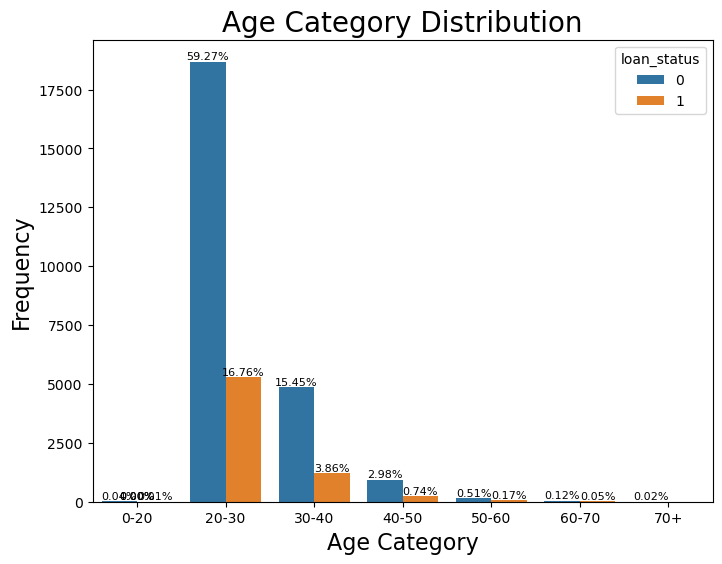

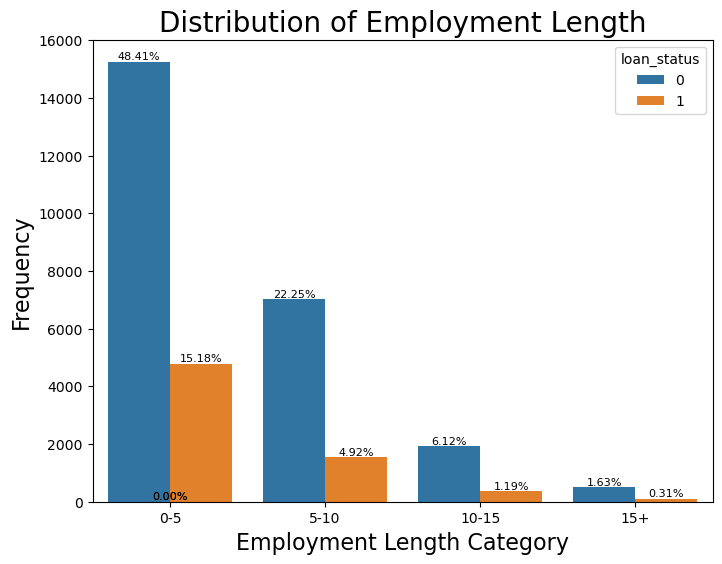

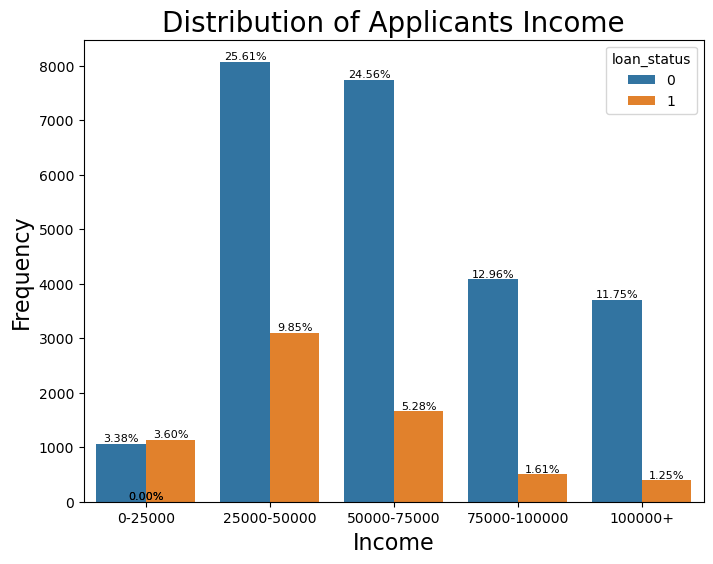

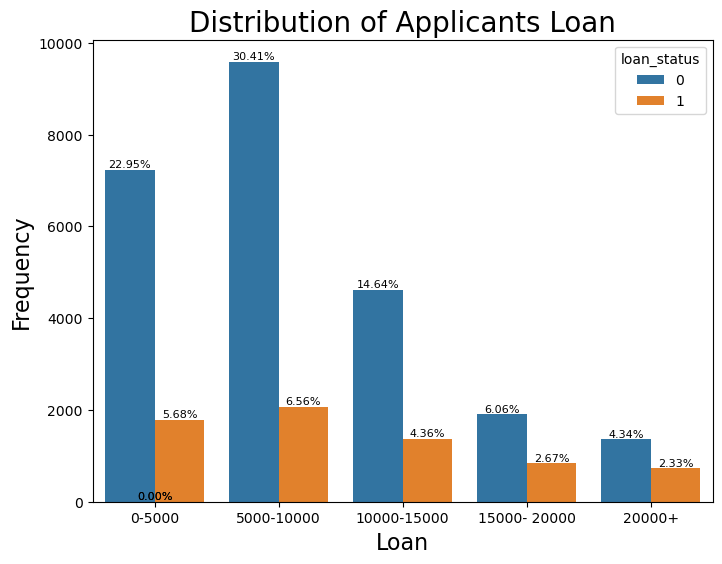

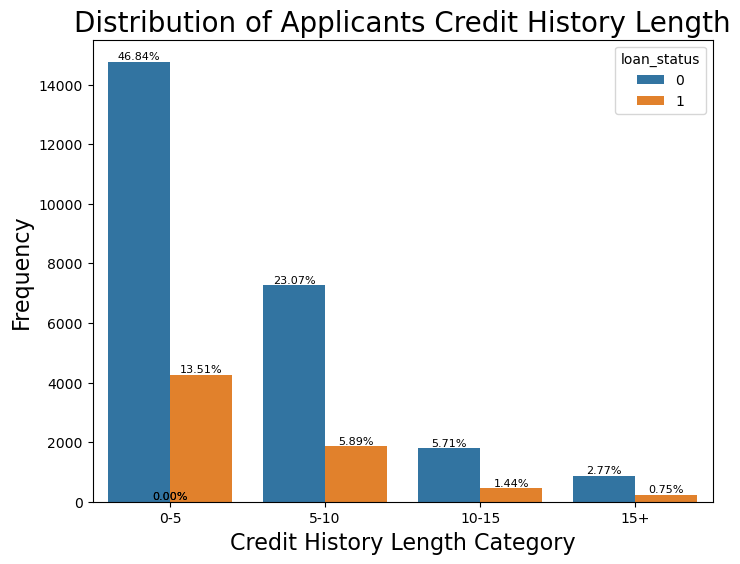

In [59]:
# Lets Visualize above data

x =["age_cat","emp_length_cat","person_income_cat","loan_amount_cat","cb_person_cred_hist_length_cat"]
titles =["Age Category Distribution","Distribution of Employment Length","Distribution of Applicants Income","Distribution of Applicants Loan","Distribution of Applicants Credit History Length"]
x_labels = ["Age Category",'Employment Length Category',"Income","Loan","Credit History Length Category"]

for i in range(len(x)):
    fig = plt.figure(figsize = (8,6))
    ax = plt.subplot()
    sns.countplot(x =x[i],data = data ,hue ='loan_status',ax = ax)
    plt.title(titles[i],fontsize =20)
    plt.xlabel(x_labels[i],fontsize =16)
    plt.ylabel("Frequency",fontsize =16)
    total_count = data.shape[0]
    for p in ax.patches:
        height = p.get_height()
        per = height/total_count
        ax.text(p.get_x() + p.get_width()/2. , height+1 , f"{per * 100:.2f}%",ha = 'center',va='bottom', fontsize = 8)
    


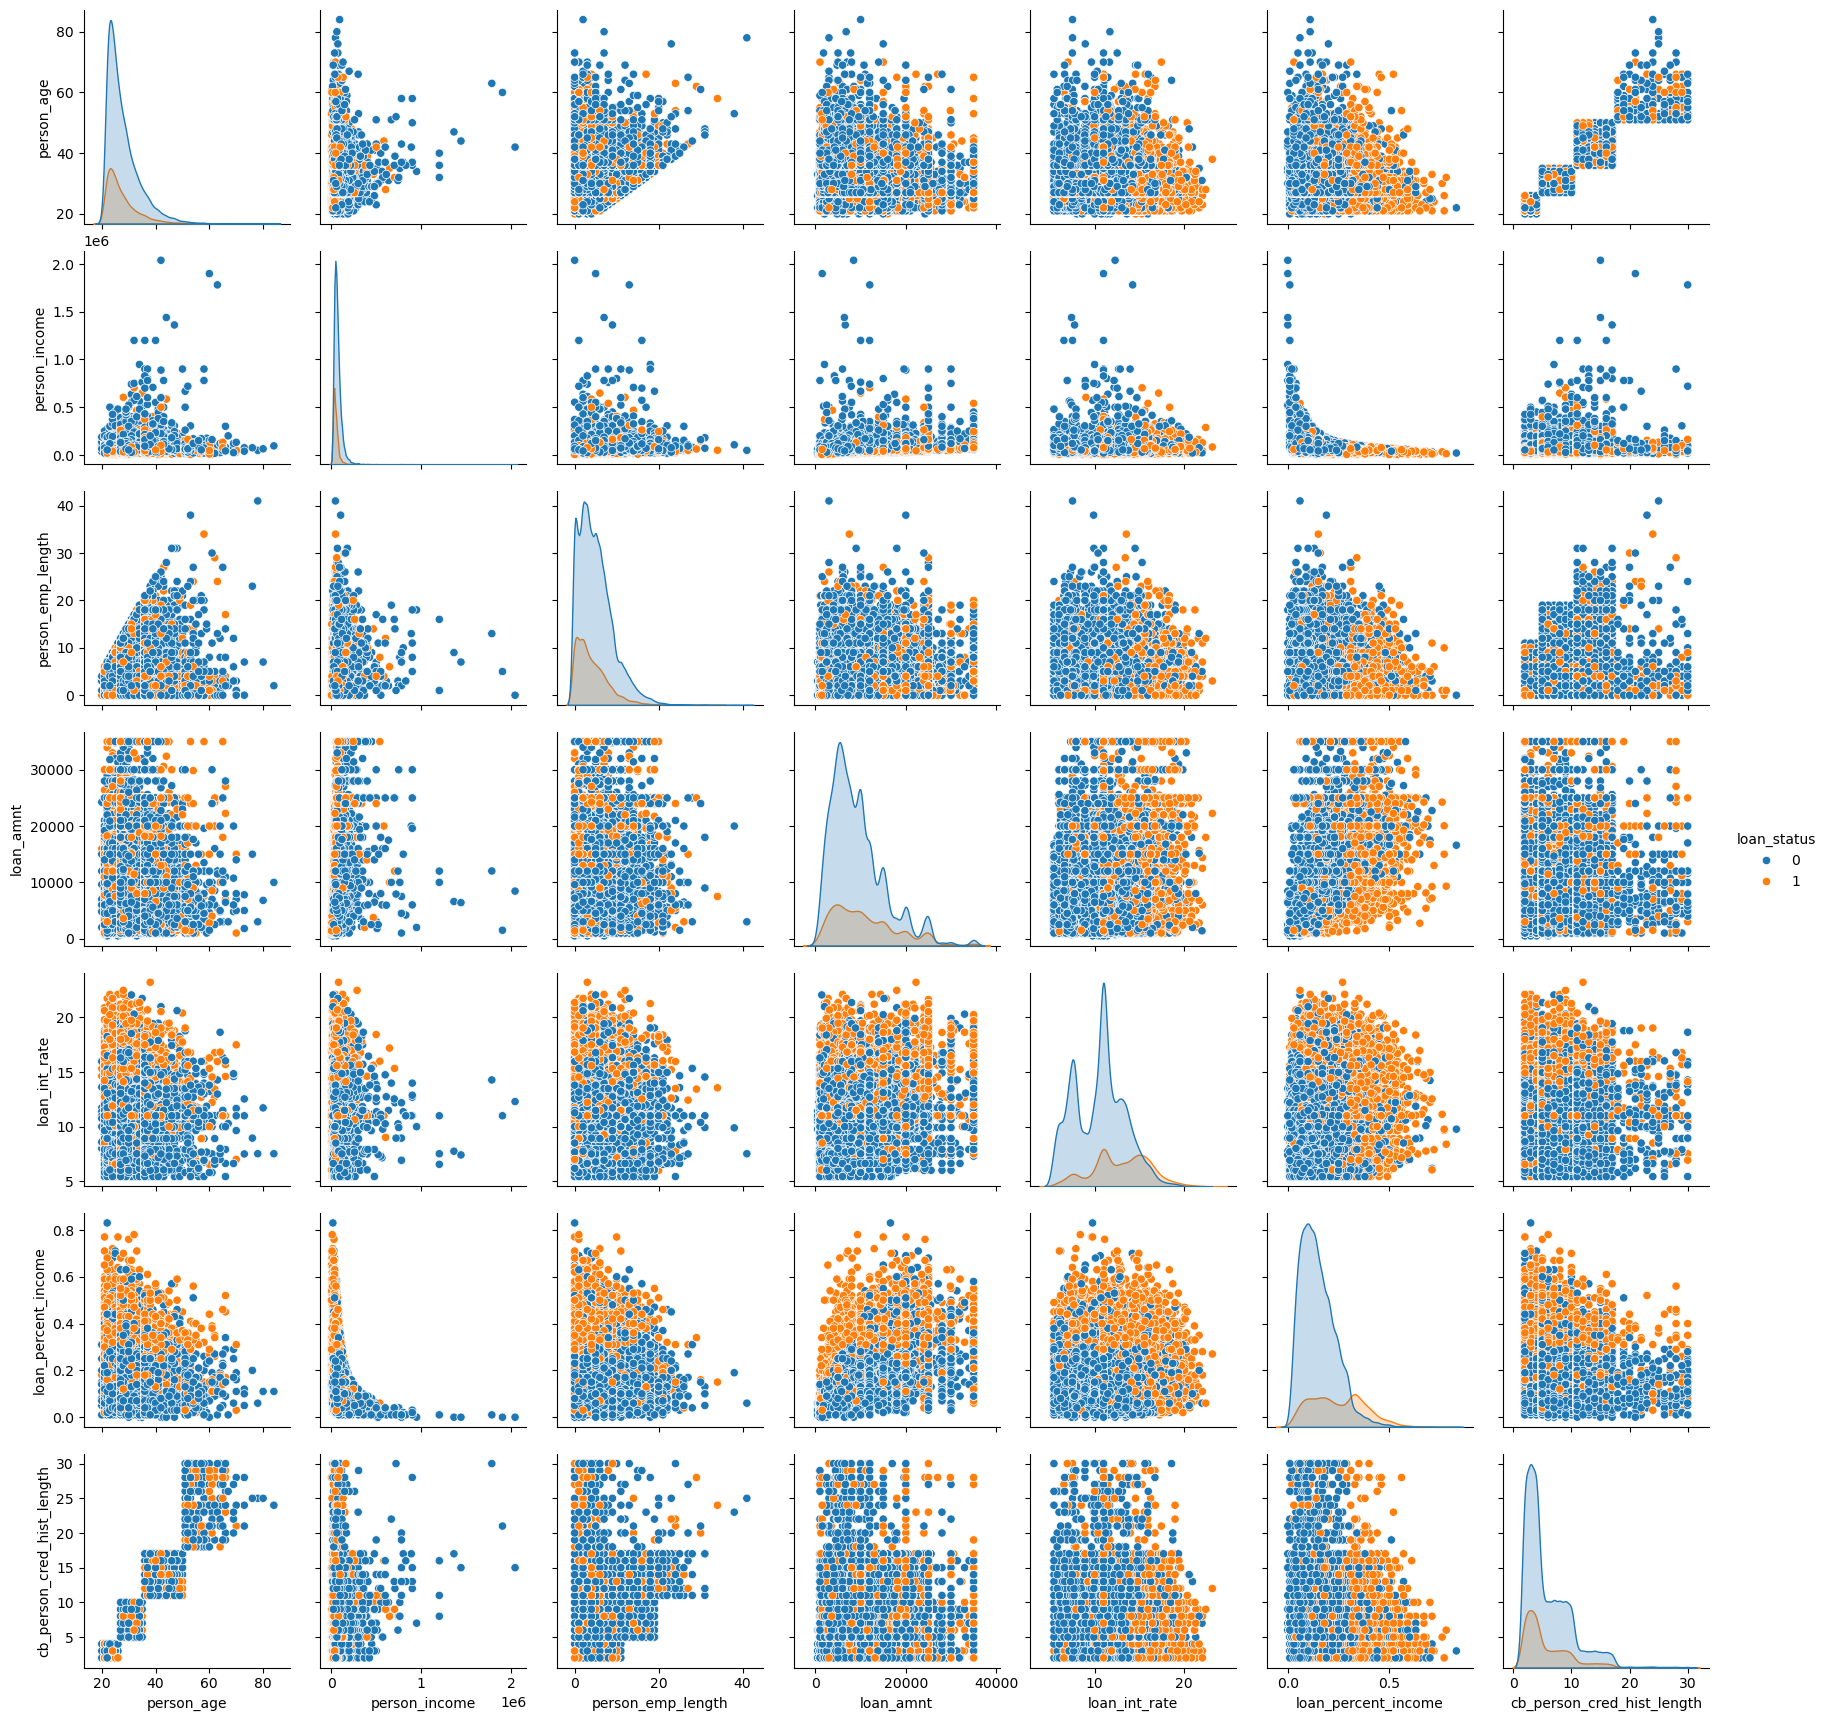

In [40]:
# General Look at all plots
sns.pairplot(data , hue = 'loan_status')

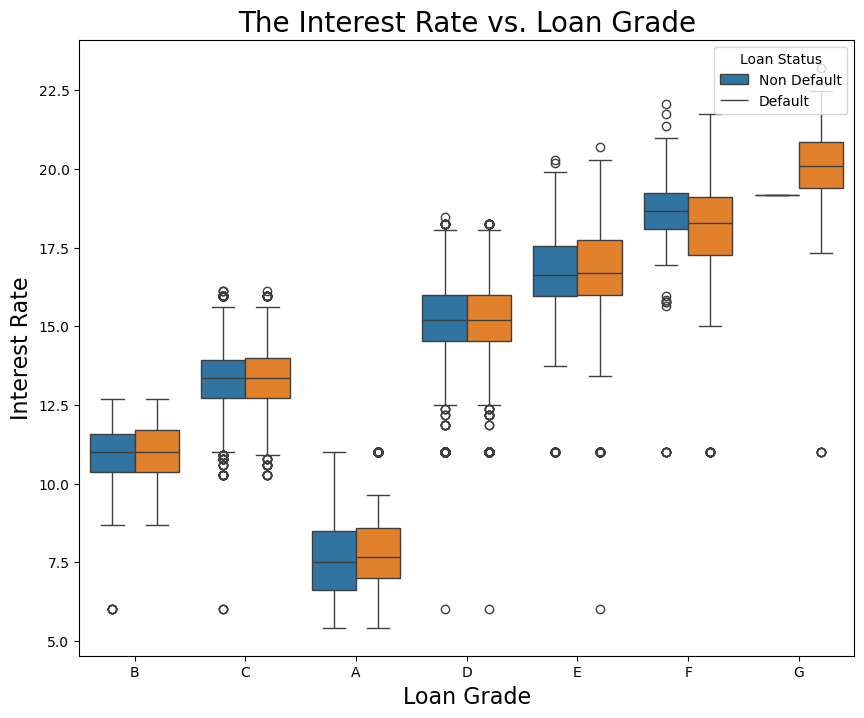

In [61]:
# Additional Plots

plt.figure(figsize=(10,8))
sns.boxplot(data=data , x = 'loan_grade',y = 'loan_int_rate',hue ='loan_status')
plt.title("The Interest Rate vs. Loan Grade", fontsize =20)
plt.xlabel('Loan Grade',fontsize =16)
plt.ylabel('Interest Rate', fontsize =16)
plt.legend(title = "Loan Status",loc = 'upper right', labels =["Non Default", "Default"])
plt.show()

### Observation:

* There is clear relationship between Loan grade and Loan interest rate , Loans with lower grades tends to have higher interest rates , while loans with higher grades(less risky) tend to have lower interest rates.

### Feature Engineering

In [36]:
# Removing unnecessary columns and seperate independent variables and target variable

X = data.drop(['loan_status','person_age','person_income', 'person_emp_length','cb_person_cred_hist_length'], axis=1)
y = data['loan_status']
print(X.info())


<class 'pandas.core.frame.DataFrame'>
Index: 31521 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_home_ownership           31521 non-null  object  
 1   loan_intent                     31521 non-null  object  
 2   loan_grade                      31521 non-null  object  
 3   loan_amnt                       31521 non-null  int64   
 4   loan_int_rate                   31521 non-null  float64 
 5   loan_percent_income             31521 non-null  float64 
 6   cb_person_default_on_file       31521 non-null  object  
 7   age_cat                         31521 non-null  category
 8   emp_length_cat                  31521 non-null  category
 9   person_income_cat               31471 non-null  category
 10  loan_amount_cat                 31521 non-null  category
 11  cb_person_cred_hist_length_cat  31521 non-null  category
dtypes: category(5), float64

In [37]:
# Spliting data into training and test datasets
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state= 42 ,stratify = y)
X_train.shape, X_test.shape

((25216, 12), (6305, 12))

In [38]:
# Encode Categorical columns
label_encoder = LabelEncoder()

X_train_cat = X_train.select_dtypes(include =['object','category'])
X_test_cat = X_test.select_dtypes(include =['object','category'])

# LabelEncoder

for column in X_train_cat.columns:
    X_train_cat[column] = label_encoder.fit_transform(X_train_cat[column])
    X_test_cat[column] = label_encoder.transform(X_test_cat[column])

In [40]:
# Scalling Categorical and numerical values

scaler = StandardScaler()

X_train_numerical = X_train.select_dtypes(include=['int64','float64'])
X_test_numerical = X_test.select_dtypes(include =['int64','float64'])

X_train_numerical['loan_int_rate'] = scaler.fit_transform(X_train_numerical[['loan_int_rate']])
X_test_numerical['loan_int_rate'] = scaler.transform(X_test_numerical[['loan_int_rate']])


In [41]:
# Concatenate scaling numerical variables
X_train = pd.concat([X_train_cat, X_train_numerical],axis = 1)
X_test = pd.concat([X_test_cat, X_test_numerical], axis=1)

X_train = X_train.drop('loan_amnt', axis =1)
X_test = X_test.drop('loan_amnt', axis =1)

In [42]:
# Check Multi-collinearity for Logistic Regression
vif_data = pd.DataFrame()
vif_data['index'] = X_train.columns
vif_data['Vif_train'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif_data["Vif_test"] = [variance_inflation_factor(X_test.values,i ) for i in range(X_test.shape[1])]
print(vif_data)

                             index  Vif_train  Vif_test
0            person_home_ownership   2.346668  2.360168
1                      loan_intent   2.880801  2.856333
2                       loan_grade   8.831860  8.962018
3        cb_person_default_on_file   1.712852  1.701104
4                          age_cat   5.412039  5.231506
5                   emp_length_cat   1.524991  1.538653
6                person_income_cat   4.458688  4.569111
7                  loan_amount_cat   2.553098  2.566531
8   cb_person_cred_hist_length_cat   1.766013  1.798172
9                    loan_int_rate   3.899537  4.020782
10             loan_percent_income   3.550562  3.574793


### Observation:

There are features (loan_grade, age_category) with VIF >=5 => potentially problem with Multicollinearity Solutions:

* delete column loan_grade
* use regularization (Lasso or Ridge) for LogisticRegression (will use this)
* use PCA - principal component analysis for dimensionally reduction

### Model Training

In [43]:
#  Create a function for hyperparameter tuning and selecting the best model with the best hyperparameters
def tuning_params(param_grid, model, X_train, y_train):

    # Perform grid search with KFold cross-validation to find the best combination of hyperparameters
    kf = KFold(n_splits=6, shuffle = True, random_state = 42)
    grid_model = GridSearchCV(estimator =model, param_grid = param_grid, scoring = "accuracy", cv = kf, n_jobs=-1)
    grid_model.fit(X_train,y_train)
    best_params =grid_model.best_params_
    best_score = grid_model.best_score_
    best_model = grid_model.best_estimator_
    test_accuracy = best_model.score(X_test,y_test)
    
    print("--------------------------")
    print("Best Hyperparameters GridSearch:", best_params)
    print("Best Score GridSearch:", best_score)
    print("Best Test accuracy: ", test_accuracy)
    print("\n")
    return best_model

In [44]:
# Create a function for models evaluation
def predict_evaluation(model, X_test, y_test):
    # Make predictions on the testing data
    y_predict = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1score = f1_score(y_test, y_predict)
    
    print('Accuracy predict: %.2f%%' % (accuracy * 100.0))
    print('Precision: %.2f%%' % (precision * 100.0))
    print('Recall: %.2f%%' % (recall * 100.0))
    print('F1_score: %.2f%%' % (f1score * 100.0))
    print("----------------------")
    
    # Create a list of evaluation metrics
    model_scores = []
    model_scores.append(accuracy)
    model_scores.append(precision)
    model_scores.append(recall)
    model_scores.append(f1score)
    
    # Print classification report
    print("Сlassification report:")
    print(classification_report(y_test, y_predict))
    print("----------------------")
    
    # Plot confusion matrix
    print("Confusion matrix:")
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("----------------------")

    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
    plt.show()
    
    # Result
    model_result = [y_predict, model_scores]
    
    return  model_result

In [52]:
from sklearn.metrics import roc_curve

In [53]:
# Predict probabilities function - create ROC curve
def roc_function(model, X_test, y_test):
    
    # predict probabilities of each instance belonging to positive class
    y_predict_probability = model.predict_proba(X_test)[:, 1] 
    #to visualize how different thresholds affect true positive and false positive rates.
    try:
        fpr, tpr, thresholds = roc_curve(y_test, y_predict_probability)
    except Exception as e:
        print(e)
    
    #Estimate AUC metric - calculate the area under the ROC curve 
    print("----------------------")
    auc = roc_auc_score(y_test, y_predict_probability)*100
    print('AUC: %.2f%%' % (auc)) 
    print("----------------------")
    
    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate',fontsize = 16)
    plt.title(f'ROC Curve',fontsize = 20)
    #plt.show()
    
    return auc

In [46]:
# Define hyperparameter grid 

param_grid = { 
    "knn" : {'n_neighbors': np.arange(1,16),'p': [1, 2]},
    "logreg" : { 'C': [0.1, 1, 10],  # regularization strength
               'penalty': ['l1', 'l2'],  # L1/L2 regularization 
               "max_iter": [1000, 2000, 3000] },
    "dt": { 'max_depth': [3, 4, 5, 6],
               'min_samples_leaf': [0.04, 0.06, 0.08]},
    "rf":{ "n_estimators":[200, 300, 400],
               'max_depth': [3, 4, 5],
               'min_samples_leaf': [0.02, 0.04, 0.06],
                "max_features":['log2','sqrt']},
    "ada":{'n_estimators': [200, 400, 600],
           'learning_rate': [0.1, 0.5, 1]},
    "gb":{ 'n_estimators': [200, 400, 600],
           'learning_rate': [0.1, 0.5, 1],
           'max_depth': [3, 5, 7]},
    "xgm":{'n_estimators': [200,400,600],
           'max_depth': [3, 5],
           'learning_rate': [0.1, 0.5, 1],
           'gamma': [0, 0.1, 0.5],
           'alpha': [0, 0.1, 0.5]}
    }

# Select model

model_full_name = { "knn": "KNeighbors Classifier", 
    "logreg" : "Logistic Regression",
    "dt": "Decision Tree Classifier",
    "rf": "Random Forest Classifier",
    "ada": "AdaBoost Classifier",
    "gb": "Gradient Boosting Classifier",
    "xgm":"Extreme Gradient Boosting Classifier"}

base_estimator = DecisionTreeClassifier(max_depth=3)
model = {"knn": KNeighborsClassifier(), 
         "logreg" : LogisticRegression(solver='liblinear',random_state = 42),
        "dt": DecisionTreeClassifier(criterion = "gini", random_state = 42),
         "rf": RandomForestClassifier(random_state = 42),
         "ada": AdaBoostClassifier(estimator = base_estimator, random_state=42, algorithm="SAMME"),
         "gb":GradientBoostingClassifier(random_state=42),
         "xgm" : xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', seed =42)
         }

model_compare = {}
model_compare_auc = {}

Model KNeighbors Classifier:
--------------------------
Best Hyperparameters GridSearch: {'n_neighbors': 9, 'p': 1}
Best Score GridSearch: 0.8596523606865882
Best Test accuracy:  0.8662965900079302


Accuracy predict: 86.63%
Precision: 76.84%
Recall: 54.55%
F1_score: 63.80%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4943
           1       0.77      0.55      0.64      1362

    accuracy                           0.87      6305
   macro avg       0.83      0.75      0.78      6305
weighted avg       0.86      0.87      0.86      6305

----------------------
Confusion matrix:
[[4719  224]
 [ 619  743]]
----------------------


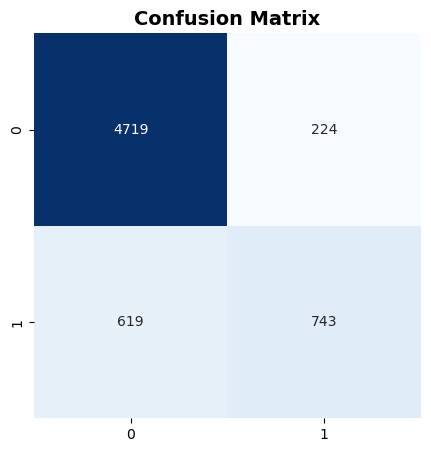

In [47]:
#K - Nearest Neighbors - KNN
name = "knn"
print(f"Model {model_full_name[name]}:")
knn_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
knn_predict = predict_evaluation(knn_best_model, X_test, y_test)
model_compare["knn"] = knn_predict[1]


Model Logistic Regression:
--------------------------
Best Hyperparameters GridSearch: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
Best Score GridSearch: 0.8450979613883075
Best Test accuracy:  0.8496431403647898


Accuracy predict: 84.96%
Precision: 74.24%
Recall: 46.55%
F1_score: 57.22%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4943
           1       0.74      0.47      0.57      1362

    accuracy                           0.85      6305
   macro avg       0.80      0.71      0.74      6305
weighted avg       0.84      0.85      0.84      6305

----------------------
Confusion matrix:
[[4723  220]
 [ 728  634]]
----------------------


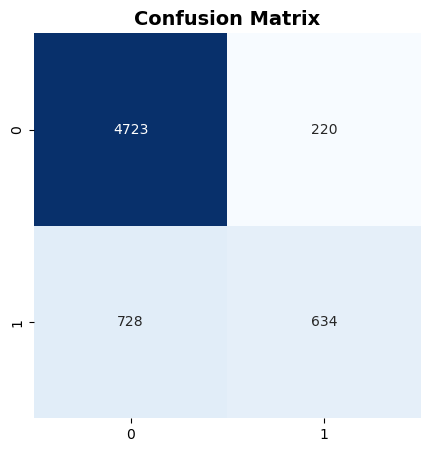

----------------------
AUC: 85.42%
----------------------


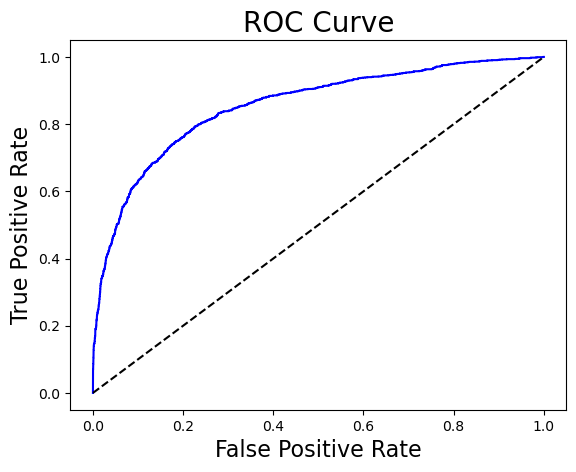

In [54]:
#Logistic Regression
name = "logreg"
print(f"Model {model_full_name[name]}:")
logreg_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
logreg_predict = predict_evaluation(logreg_best_model, X_test, y_test)
model_compare["logreg"] = logreg_predict[1]
logreg_auc=roc_function(logreg_best_model, X_test, y_test)
model_compare_auc["logreg"] = logreg_auc

Model Decision Tree Classifier:
--------------------------
Best Hyperparameters GridSearch: {'max_depth': 3, 'min_samples_leaf': 0.04}
Best Score GridSearch: 0.8825744316792224
Best Test accuracy:  0.8818398096748612


Accuracy predict: 88.18%
Precision: 80.45%
Recall: 59.84%
F1_score: 68.63%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4943
           1       0.80      0.60      0.69      1362

    accuracy                           0.88      6305
   macro avg       0.85      0.78      0.81      6305
weighted avg       0.88      0.88      0.88      6305

----------------------
Confusion matrix:
[[4745  198]
 [ 547  815]]
----------------------


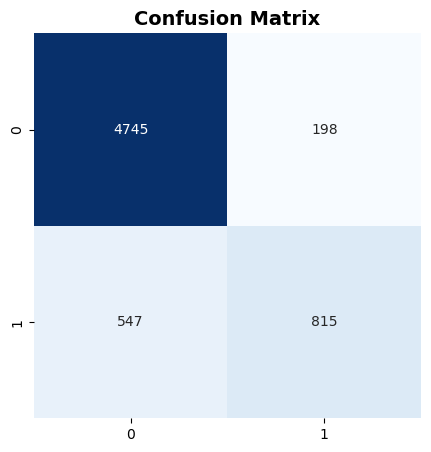

----------------------
AUC: 85.68%
----------------------


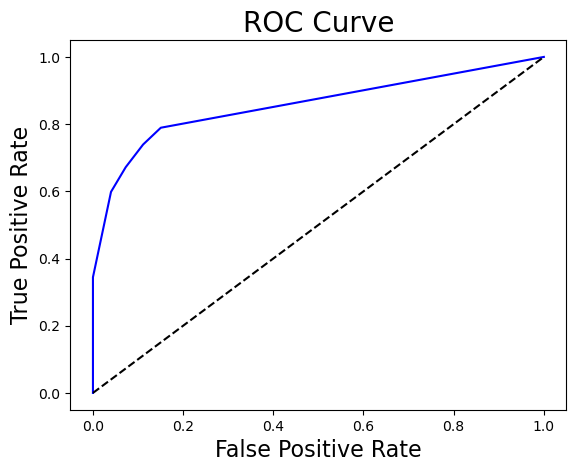

In [55]:
#DecisionTree
name = "dt"
print(f"Model {model_full_name[name]}:")
dt_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
dt_predict = predict_evaluation(dt_best_model, X_test, y_test)
model_compare["dt"] = dt_predict[1]
dt_auc=roc_function(dt_best_model, X_test, y_test)
model_compare_auc["dt"] = dt_auc


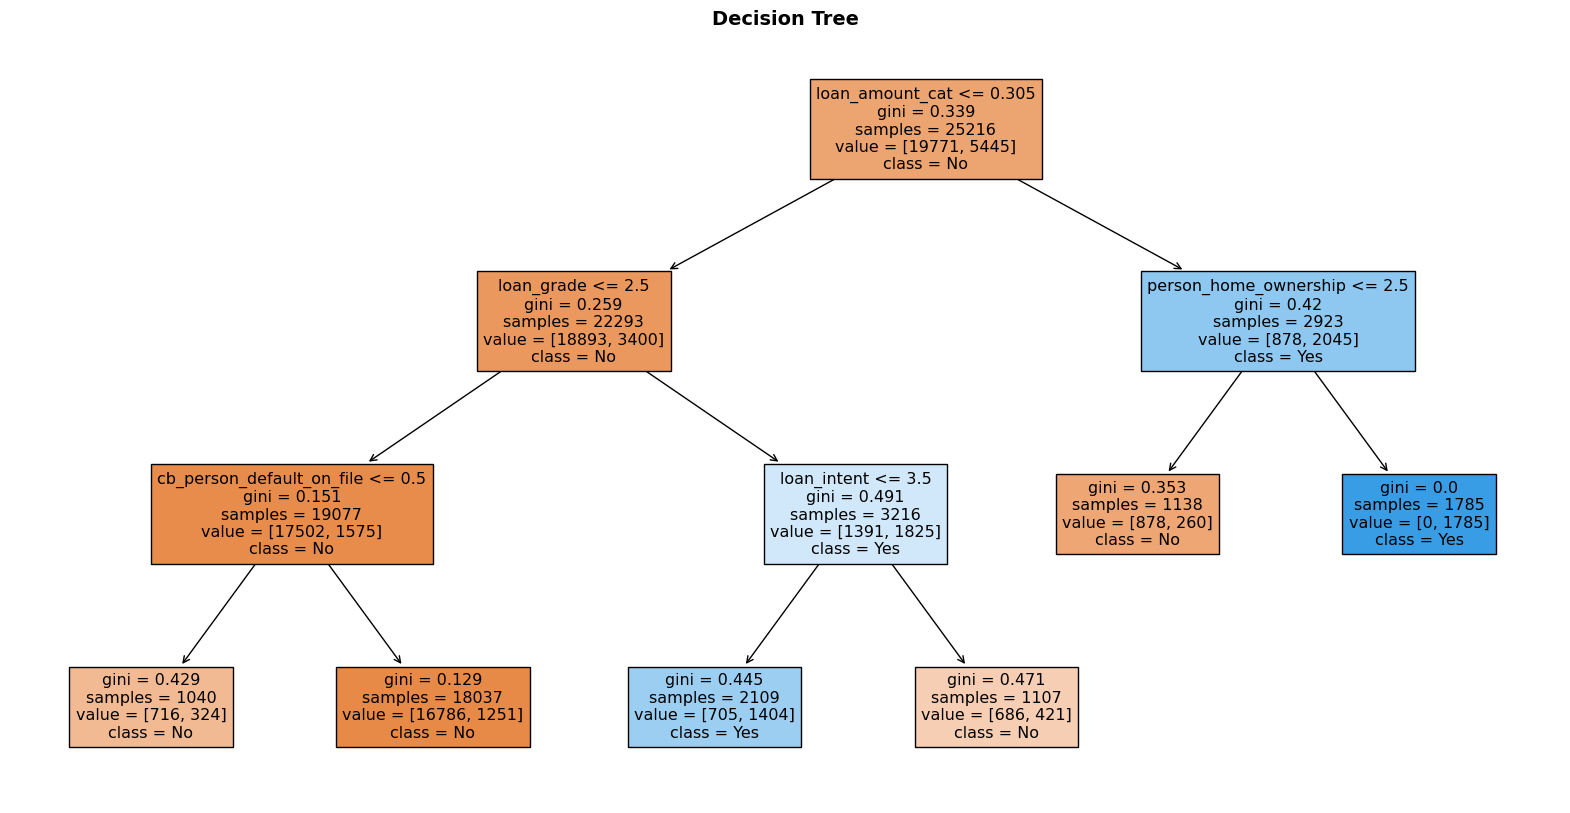

In [61]:
# Visualisation of Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_best_model, filled=True, feature_names=list(X.columns),class_names=["No", "Yes"])
plt.title("Decision Tree", fontsize=14, fontweight='bold')
plt.show()

cb_person_default_on_file         0.00
age_cat                           0.00
emp_length_cat                    0.00
loan_amount_cat                   0.00
cb_person_cred_hist_length_cat    0.00
loan_int_rate                     0.00
person_income_cat                 0.03
loan_intent                       0.03
person_home_ownership             0.21
loan_grade                        0.33
loan_percent_income               0.40
dtype: float64


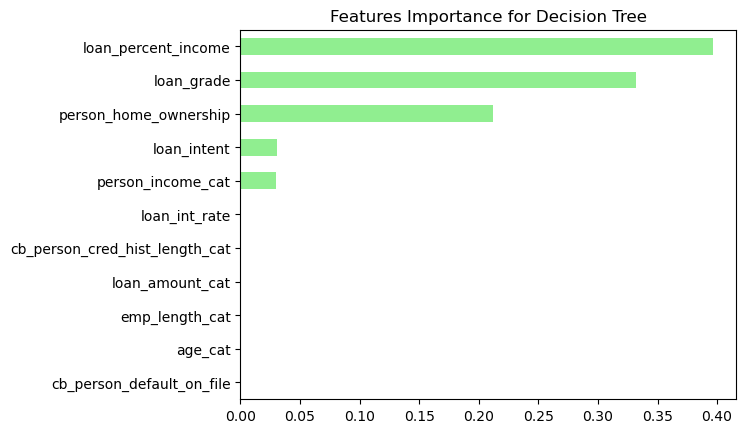

In [62]:
# Features Importance for Decision Tree
importances_dt = pd.Series(dt_best_model.feature_importances_, index =X_train.columns).sort_values()
print(round(importances_dt,2))
importances_dt.plot(kind ="barh", color = "lightgreen")
plt.title("Features Importance for Decision Tree")
plt.show()

Model Voting Classifier:
Accuracy predict: 88.50%
Precision: 84.14%
Recall: 57.64%
F1_score: 68.41%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4943
           1       0.84      0.58      0.68      1362

    accuracy                           0.89      6305
   macro avg       0.87      0.77      0.81      6305
weighted avg       0.88      0.89      0.88      6305

----------------------
Confusion matrix:
[[4795  148]
 [ 577  785]]
----------------------


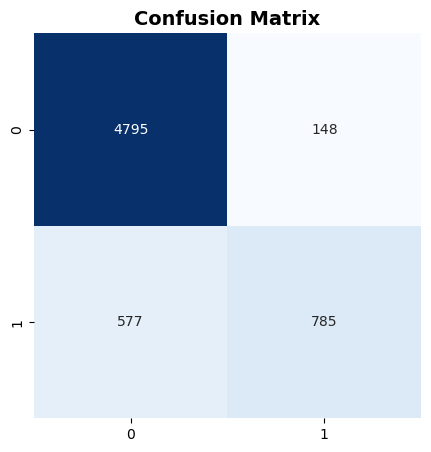

In [63]:
# Voting Classifier
print(f"Model Voting Classifier:")
classifiers = [(model_full_name["knn"], knn_best_model),(model_full_name["logreg"], logreg_best_model),(model_full_name["dt"],dt_best_model)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train,y_train)
vc_predict = predict_evaluation(vc, X_test, y_test)
model_compare["vc"] = vc_predict[1]

Model Random Forest Classifier:
--------------------------
Best Hyperparameters GridSearch: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.02, 'n_estimators': 300}
Best Score GridSearch: 0.8804725223466886
Best Test accuracy:  0.8851704996034893


Accuracy predict: 88.18%
Precision: 80.45%
Recall: 59.84%
F1_score: 68.63%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4943
           1       0.80      0.60      0.69      1362

    accuracy                           0.88      6305
   macro avg       0.85      0.78      0.81      6305
weighted avg       0.88      0.88      0.88      6305

----------------------
Confusion matrix:
[[4745  198]
 [ 547  815]]
----------------------


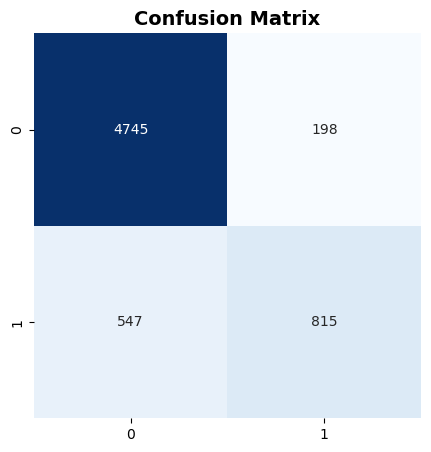

----------------------
AUC: 89.18%
----------------------


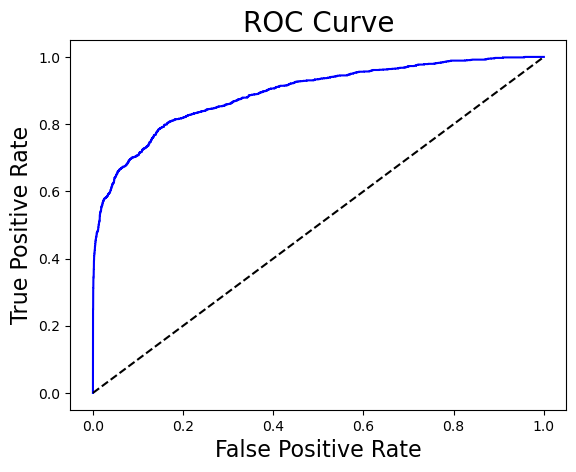

In [64]:
# Random Forest Classifier
name = "rf"
print(f"Model {model_full_name[name]}:")
rf_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
rf_predict = predict_evaluation(dt_best_model, X_test, y_test)
model_compare["rf"] = rf_predict[1]
rf_auc=roc_function(rf_best_model, X_test, y_test)
model_compare_auc["rf"]=rf_auc

age_cat                           0.00
cb_person_cred_hist_length_cat    0.00
emp_length_cat                    0.00
loan_amount_cat                   0.01
loan_intent                       0.01
cb_person_default_on_file         0.02
person_income_cat                 0.05
person_home_ownership             0.08
loan_int_rate                     0.17
loan_grade                        0.26
loan_percent_income               0.40
dtype: float64


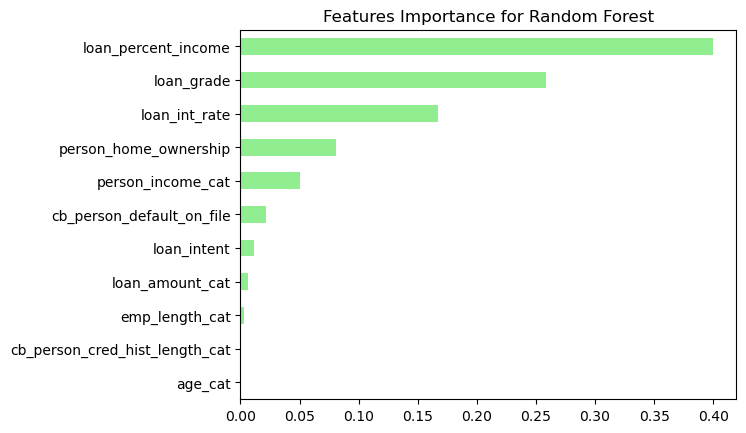

In [65]:
# Features Importance for Random Forest
importances_rf = pd.Series(rf_best_model.feature_importances_, index =X_train.columns).sort_values()
print(round(importances_rf,2))
importances_rf.plot(kind ="barh", color = "lightgreen")
plt.title("Features Importance for Random Forest")
plt.show()

Model AdaBoost Classifier:
--------------------------
Best Hyperparameters GridSearch: {'learning_rate': 1, 'n_estimators': 600}
Best Score GridSearch: 0.9060516994332032
Best Test accuracy:  0.9129262490087232


Accuracy predict: 91.29%
Precision: 89.35%
Recall: 67.77%
F1_score: 77.08%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4943
           1       0.89      0.68      0.77      1362

    accuracy                           0.91      6305
   macro avg       0.91      0.83      0.86      6305
weighted avg       0.91      0.91      0.91      6305

----------------------
Confusion matrix:
[[4833  110]
 [ 439  923]]
----------------------


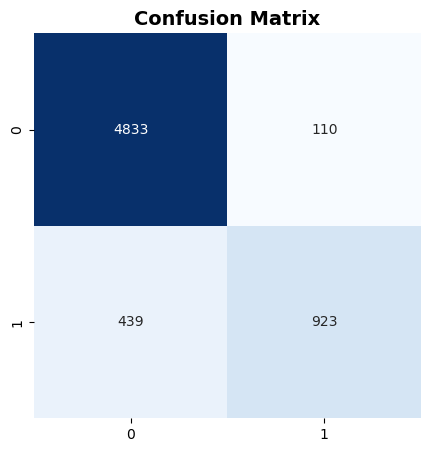

----------------------
AUC: 92.18%
----------------------


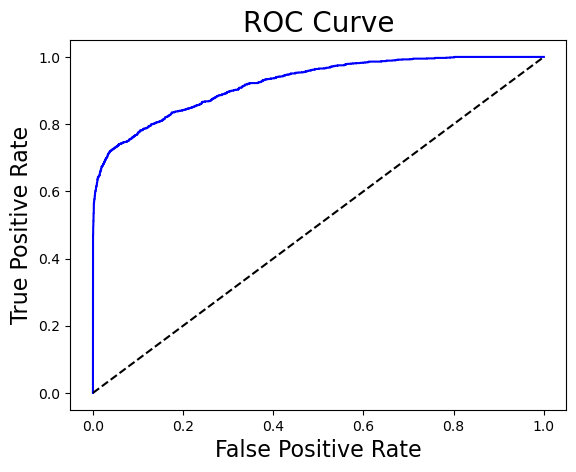

In [66]:
#Ada Boosting
base_estimator = dt_best_model
name ="ada"
print(f"Model {model_full_name[name]}:")
ada_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
ada_predict = predict_evaluation(ada_best_model, X_test, y_test)
model_compare["ada"] = ada_predict[1]
ada_auc=roc_function(ada_best_model, X_test, y_test)
model_compare_auc["ada"]=ada_auc

cb_person_default_on_file         0.00
cb_person_cred_hist_length_cat    0.00
age_cat                           0.01
emp_length_cat                    0.01
loan_amount_cat                   0.05
person_income_cat                 0.07
loan_int_rate                     0.09
loan_intent                       0.13
person_home_ownership             0.14
loan_grade                        0.24
loan_percent_income               0.25
dtype: float64


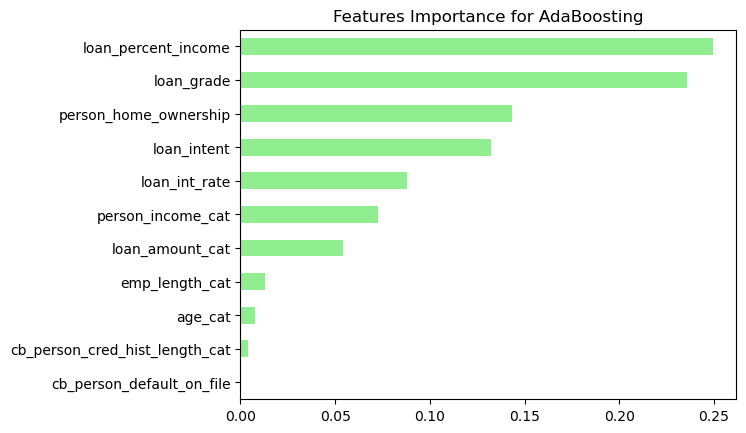

In [67]:
# Features Importance for AdaBoosting
importances_ada = pd.Series(ada_best_model.feature_importances_, index =X_train.columns).sort_values()
print(round(importances_ada,2))
importances_ada.plot(kind ="barh", color = "lightgreen")
plt.title("Features Importance for AdaBoosting")
plt.show()

Model Gradient Boosting Classifier:
--------------------------
Best Hyperparameters GridSearch: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score GridSearch: 0.9143398362094058
Best Test accuracy:  0.9208564631245043


Accuracy predict: 92.09%
Precision: 92.51%
Recall: 68.94%
F1_score: 79.01%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4943
           1       0.93      0.69      0.79      1362

    accuracy                           0.92      6305
   macro avg       0.92      0.84      0.87      6305
weighted avg       0.92      0.92      0.92      6305

----------------------
Confusion matrix:
[[4867   76]
 [ 423  939]]
----------------------


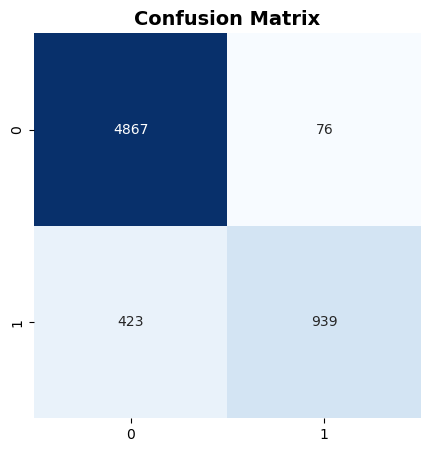

----------------------
AUC: 92.76%
----------------------


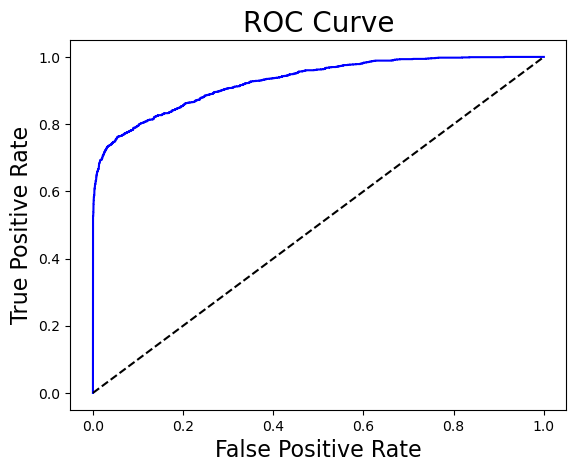

In [68]:
# Gradient Boosting
name ="gb"
print(f"Model {model_full_name[name]}:")
gb_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
gb_predict = predict_evaluation(gb_best_model, X_test, y_test)
model_compare["gb"] = gb_predict[1]
gb_auc=roc_function(gb_best_model, X_test, y_test)
model_compare_auc["gb"]=gb_auc

cb_person_default_on_file         0.00
cb_person_cred_hist_length_cat    0.00
age_cat                           0.00
emp_length_cat                    0.02
loan_amount_cat                   0.03
loan_int_rate                     0.03
person_income_cat                 0.04
loan_intent                       0.11
person_home_ownership             0.19
loan_grade                        0.26
loan_percent_income               0.31
dtype: float64


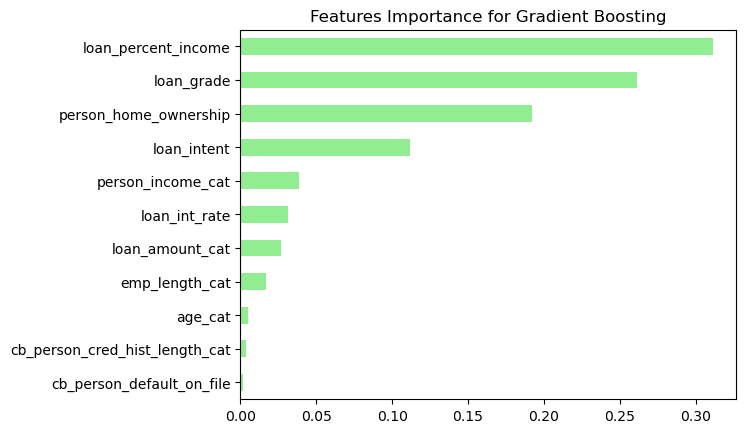

In [70]:
# Features Importance for Gradient Boosting
importances_gb = pd.Series(gb_best_model.feature_importances_, index =X_train.columns).sort_values()
print(round(importances_gb,2))
importances_gb.plot(kind ="barh", color = "lightgreen")
plt.title("Features Importance for Gradient Boosting")
plt.show()

Model Extreme Gradient Boosting Classifier:
--------------------------
Best Hyperparameters GridSearch: {'alpha': 0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
Best Score GridSearch: 0.915370855242712
Best Test accuracy:  0.9192704203013481


Accuracy predict: 91.93%
Precision: 91.94%
Recall: 68.65%
F1_score: 78.60%
----------------------
Сlassification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4943
           1       0.92      0.69      0.79      1362

    accuracy                           0.92      6305
   macro avg       0.92      0.83      0.87      6305
weighted avg       0.92      0.92      0.91      6305

----------------------
Confusion matrix:
[[4861   82]
 [ 427  935]]
----------------------


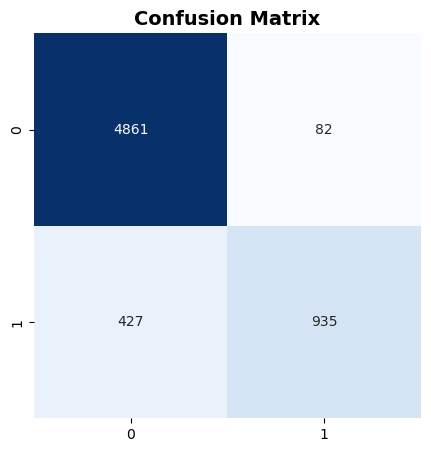

----------------------
AUC: 92.68%
----------------------


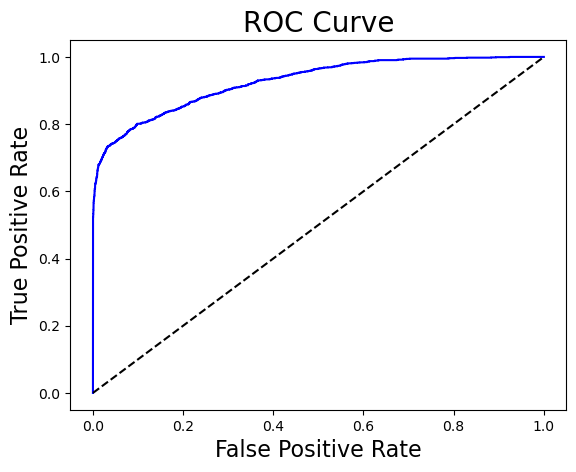

In [71]:
# Extreme Gradient Boosting with XGBoost
name ="xgm"
print(f"Model {model_full_name[name]}:")
xgm_best_model = tuning_params(param_grid[name], model[name], X_train, y_train) 
xgm_predict = predict_evaluation(xgm_best_model, X_test, y_test)
model_compare["xgm"] = xgm_predict[1]
xgm_auc=roc_function(xgm_best_model, X_test, y_test)
model_compare_auc["xgm"]=xgm_auc

cb_person_default_on_file         0.02
age_cat                           0.02
cb_person_cred_hist_length_cat    0.02
loan_int_rate                     0.02
emp_length_cat                    0.03
loan_amount_cat                   0.04
person_income_cat                 0.07
loan_intent                       0.09
loan_percent_income               0.14
person_home_ownership             0.21
loan_grade                        0.35
dtype: float32


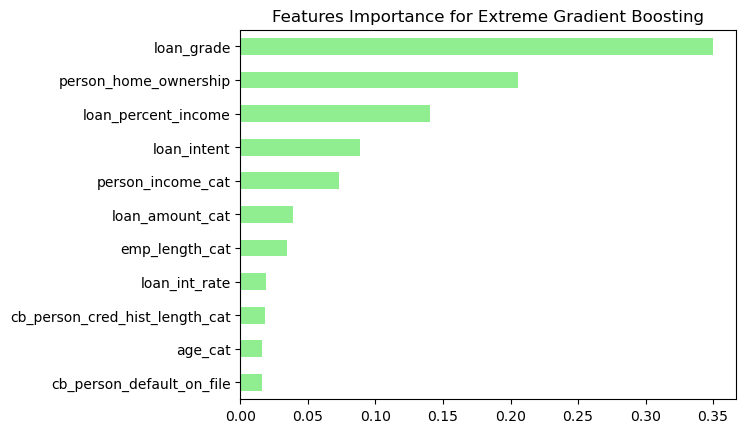

{'person_home_ownership': 433.0, 'loan_intent': 694.0, 'loan_grade': 442.0, 'cb_person_default_on_file': 68.0, 'age_cat': 175.0, 'emp_length_cat': 257.0, 'person_income_cat': 422.0, 'loan_amount_cat': 410.0, 'cb_person_cred_hist_length_cat': 215.0, 'loan_int_rate': 1184.0, 'loan_percent_income': 1255.0}


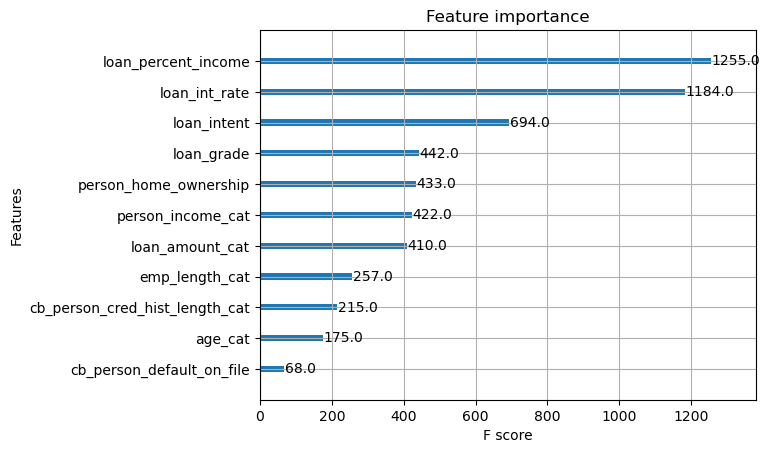

In [72]:
# Features Importance for Gradient Boosting

# to tell which features are most useful for splitting the data
importances_xgm = pd.Series(xgm_best_model.feature_importances_, index =X_train.columns).sort_values()
print(round(importances_xgm,2))
importances_xgm.plot(kind ="barh", color = "lightgreen")
plt.title("Features Importance for Extreme Gradient Boosting")
plt.show()

#To tell which features are most frequently used in the final model
# Weight: the number of times the column appears in all trees
print(xgm_best_model.get_booster().get_score(importance_type='weight'))

xgb.plot_importance(xgm_best_model, importance_type='weight')
plt.show()

### Models Compare

In [73]:
print("Metrics compare:")
result_metrics = pd.DataFrame(model_compare, index = ["Accuracy_predict","Precision","Recall","F1_score"])
print(round(result_metrics.T*100,2))
print("-------------------------------------------------\n")
print("AUC compare:")
result_metrics_auc = pd.DataFrame(model_compare_auc, index = ["AUC"])
print(result_metrics_auc)

Metrics compare:
        Accuracy_predict  Precision  Recall  F1_score
knn                86.63      76.84   54.55     63.80
logreg             84.96      74.24   46.55     57.22
dt                 88.18      80.45   59.84     68.63
vc                 88.50      84.14   57.64     68.41
rf                 88.18      80.45   59.84     68.63
ada                91.29      89.35   67.77     77.08
gb                 92.09      92.51   68.94     79.01
xgm                91.93      91.94   68.65     78.60
-------------------------------------------------

AUC compare:
        logreg         dt         rf        ada         gb        xgm
AUC  85.422822  85.681133  89.180639  92.182622  92.758705  92.683894


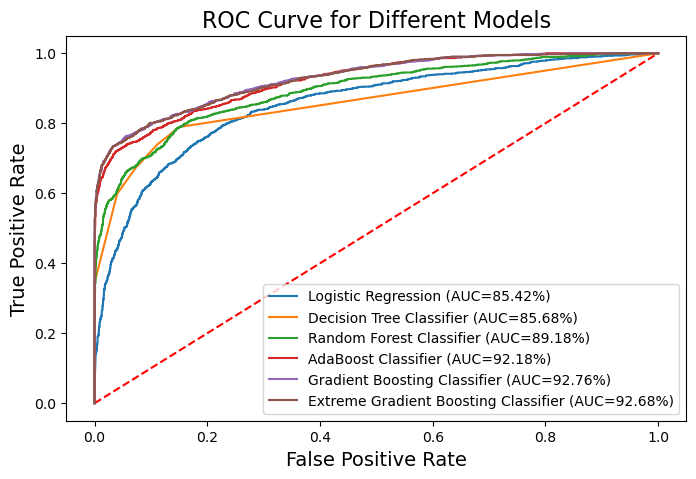

In [74]:
# Plot ROC curve with AUC values for all models to compare
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot([0, 1], [0, 1], 'r--')

best_models =[logreg_best_model,dt_best_model,rf_best_model,ada_best_model,gb_best_model,xgm_best_model]

names_best_models = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier","AdaBoost Classifier", "Gradient Boosting Classifier","Extreme Gradient Boosting Classifier"]

for i,k in enumerate(best_models):
    y_predict_proba = k.predict_proba(X_test)[:, 1]
    fpr_, tpr_, _ = roc_curve(y_test, y_predict_proba)
    auc_ = roc_auc_score(y_test, y_predict_proba)
    ax.plot(fpr_, tpr_, label=f'{names_best_models[i]} (AUC={auc_*100:.2f}%)')
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.title("ROC Curve for Different Models",fontsize=16)
    plt.legend()
plt.show()


### Observation: 
Based on the metrics comparison, we can draw the following conclusions:

* The Gradient Boosting(GB) and XGBoost models have the highest accuracy, with values of 92.02% and 92.07%, respectively.These models outperform the other models.
* The XGBoost model has the highest precision with value of 92.50%. This indicates that XGBoost is better at correctly identifying positive cases (i.e., individuals who will default on their loans).
* The GB model has the highest recall, with a value of 68.94%. This indicates that GB is better at identifying all instances of defaulting individuals.
* The XGBoost model has the highest F1-score, with a value of 78.96%. This suggests that XGBoost provides a good balance between precision and recall.
* The Gradient Boosting(GB) and XGBoost models provide a good balance between accuracy, precision, recall, and F1-score
The GB model has the highest AUC value - 92.65%. This indicates that GB is able to correctly rank instances in order of their probability of defaulting on their loans, with a higher AUC value indicating better performance. XGBoost model has almost the same AUC value - 92.645, indicating that it is also able to correctly rank instances according to their probability of defaulting.

### Conclusions:
* XGBoost and GB models are the best-performing models for predicting credit risk in terms of both accuracy and AUC, indicating its ability to correctly predict credit risk and rank instances according to their probability of defaulting.

* The other models (KNN, LogReg, DT, VC) have lower AUC values and accuracy, indicating that they may not be as effective in predicting credit risk and ranking instances according to their probability of defaulting.


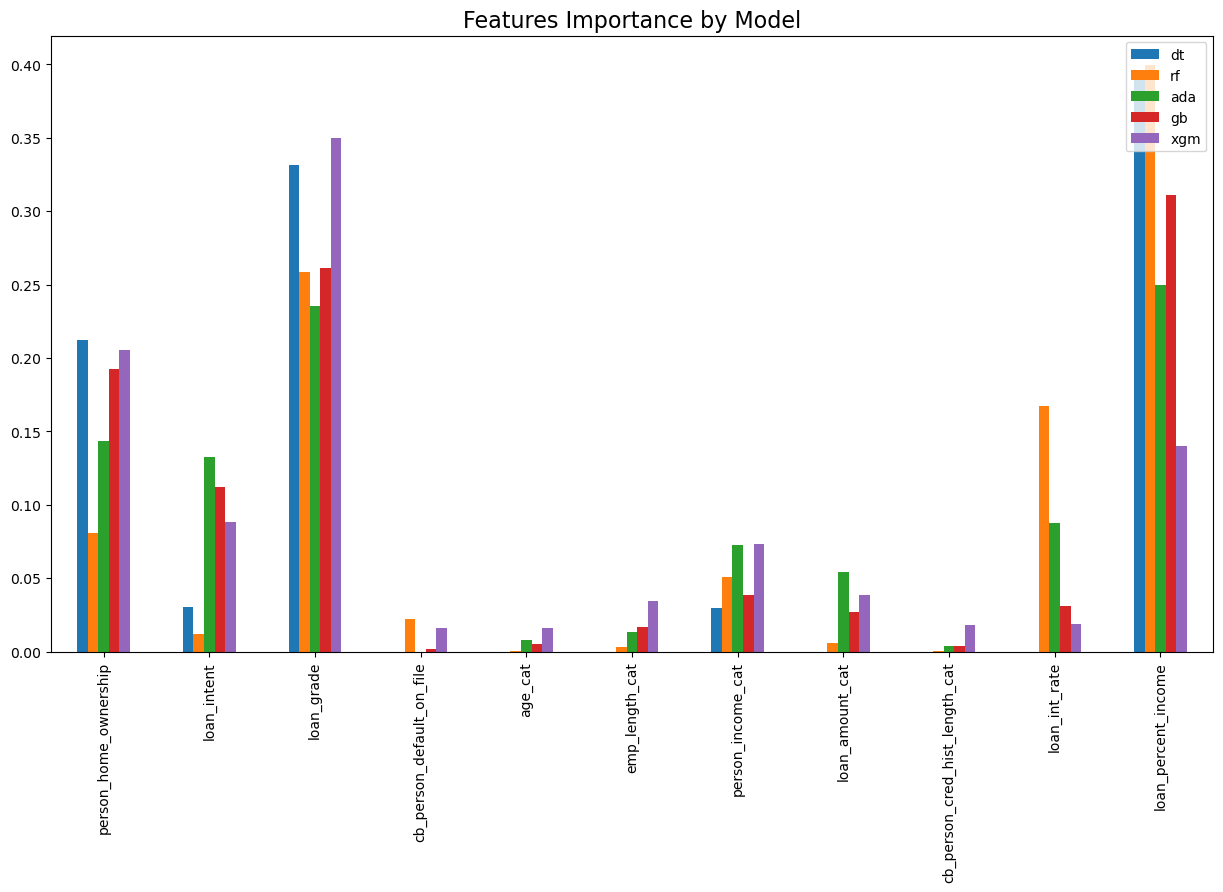

In [75]:
#Feature Compare
importance_df = pd.DataFrame()
importance_df["dt"]=pd.Series(dt_best_model.feature_importances_, index =X_train.columns)
importance_df["rf"]=pd.Series(rf_best_model.feature_importances_, index =X_train.columns)
importance_df["ada"]=pd.Series(ada_best_model.feature_importances_, index =X_train.columns)
importance_df["gb"] = pd.Series(gb_best_model.feature_importances_, index =X_train.columns)
importance_df["xgm"]= pd.Series(xgm_best_model.feature_importances_, index =X_train.columns)

fig, ax = plt.subplots(figsize=(15, 8))
importance_df.plot.bar( stacked = False, ax=ax)
ax.set_title('Features Importance by Model', fontsize=16)
ax.legend(loc='upper right')
plt.show()


Conclusions:

* The feature with the highest importance for almost all models is cb_person_cred_hist_length_category. Depend on model the value varies 27.39 - 39.64%. Only for XGBoost model the most importance feature is loan_grade with value of 35.68%.

* The features with the lowest importance are:

    * - loan_int_rate for almost all models with importance ranging from 0 to 2.36%
    * - person_income_category and loan_percent_income with importance ranging from 0 to 1.7%  
    * - person_emp_length_category for most models with importance ranging from 0 to 4.27%.
      -
* All models agree on the importance of some features, such as: cb_person_cred_hist_length_category, loan_grade, person_home_ownership and age_category.

* However, the models also have some differences in their feature importance:

* - ADA, XGM and GB consider loan_intent to be important, while DT and RF do not.
* - RF and ADA consider loan_amnt_category to be important, while XGB and GB do not.

* Overall, the results suggest that the most important features are related to credit history, loan grade, home_ownership and age category, while the least important features are related to loan interest rate and income/employment categories.